In [1]:
import os
import glob
import importlib
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import pylab as pl
import seaborn as sns

In [2]:
import analyze2p.gratings.utils as gutils
import analyze2p.plotting as pplot
import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils as hutils

import analyze2p.decoding as dec

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [644]:
#### Plotting params
visual_areas, area_colors = pplot.set_threecolor_palette()
pplot.set_plot_params(axis_labelsize=7, lw_axes=0.25)
bw_colors = dict((v, [0.7]*3) for v in visual_areas)
#### Set trace ID and FOV/state type
# aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
# rootdir='/n/coxfs01/2p-data'
aggregate_dir = '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas'
rootdir = '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-data'

fov_type = 'zoom2p0x'
state = 'awake'
traceid = 'traces001'
# ----------------------------------------

In [4]:
%matplotlib notebook

In [5]:
experiment = 'blobs'
trial_epoch = 'stimulus'
responsive_test='ROC'
# ----------------------------------------
response_type='dff'
if responsive_test=='nstds':
    responsive_thr=7.0 if experiment=='rfs' else 10.
else:
    responsive_thr=0.05 if responsive_test=='ROC' else responsive_thr
resp_desc = '%s_responsive-%s-thr%.2f' \
                % (response_type, responsive_test, responsive_thr)
data_id = '|'.join([traceid, resp_desc])
print(data_id)
# ------------------------------------------------------------------
# Load all metdata and assigned cells
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
experiment_list = ['rfs10', 'rfs'] if experiment=='rfs' else [experiment]
meta = sdata[sdata.experiment.isin(experiment_list)].copy()
# CELLS = pd.concat([g for (va, dk), g in cells0.groupby(['visual_area', 'datakey'])\
#                 if not meta.query('@va == visual_area and @dk == datakey').empty])
# # Neural data
# NDATA0 = aggr.load_responsive_neuraldata(experiment, traceid=traceid,
#                       response_type=response_type, trial_epoch=trial_epoch,
#                       responsive_test=responsive_test, 
#                       responsive_thr=responsive_thr)
# if experiment not in ['rfs', 'rfs10']: # assigned in load_responsive_neuraldata()
#     NDATA0['experiment'] = experiment 

traces001|dff_responsive-ROC-thr0.05
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 12 dsets


In [6]:
C_value=1.0
test_split=0.2
cv_nfolds=5

chance_level = 1/8. if experiment=='gratings' else 0.5

In [587]:
analysis_type='by_ncells'
test_type='size_single'
class_name = 'morphlevel'
match_rfs = False
overlap_thr= 0#'noRF' #0.0 #0.0
greater_than=True

overlap_str = 'greaterthan' if greater_than else ''
test_str = 'default' if test_type is None else test_type
basedir = os.path.join(aggregate_dir, 'decoding', 'py3_%s' % analysis_type,
                      class_name, '%s' % test_str)
if not os.path.exists(basedir):
    os.makedirs(basedir)
print(basedir)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single


## Output dirs

In [588]:
aggr_id = dec.create_aggregate_id(C_value=C_value, 
                            trial_epoch=trial_epoch,
                            responsive_test=responsive_test,
                            match_rfs=match_rfs, overlap_thr=overlap_thr)
if overlap_thr is not None and isinstance(overlap_thr, (list, np.ndarray)) or match_rfs:
    curr_dst_dir = os.path.join(basedir, 'controls')
else:
    curr_dst_dir = os.path.join(basedir, aggr_id)
curr_dst_dir = curr_dst_dir + '2'

if not os.path.exists(curr_dst_dir):
    os.makedirs(curr_dst_dir)
print(curr_dst_dir)
print(aggr_id)

FIGDIR = os.path.join(aggregate_dir, 'FIGURES', 'dcode_generalization_MIGR')
if not os.path.exists(FIGDIR):
    os.makedirs(FIGDIR)
print(FIGDIR)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002
dff-ROC__stimulus__overlap0.00__C1.00
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/dcode_generalization_MIGR


## Load

In [589]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [590]:
experiment = 'gratings' if class_name=='ori' else 'blobs'
iterdf, missing_ = dec.load_iterdf(meta, class_name,
                          experiment=experiment,
                          analysis_type=analysis_type,
                          test_type=test_type,
                          traceid=traceid,
                          trial_epoch=trial_epoch, responsive_test=responsive_test, 
                          C_value=C_value, break_correlations=False, 
                          match_rfs=match_rfs, overlap_thr=overlap_thr)
if match_rfs and (responsive_test=='ROC'):
    iterdf = iterdf[iterdf.n_cells<=96]

(Li) Found 14 paths
(Lm) Found 14 paths
(V1) Found 15 paths


In [591]:
# iterdf[ (iterdf['iteration']==0) & (iterdf['condition']=='data')
#       & (iterdf['n_cells']==120) & (iterdf['visual_area']=='Li')
#       & (iterdf['novel']==False)]

In [592]:
iterdf.columns

Index(['fit_time', 'score_time', 'test_score', 'train_score',
       'heldout_test_score', 'C', 'randi', 'condition', 'train_transform',
       'test_transform', 'n_trials', 'novel', 'iteration', 'n_cells',
       'randi_cells', 'visual_area', 'datakey', 'intact', 'noise_corrs',
       'overlap_thr'],
      dtype='object')

In [593]:
# Load same as iterdf, but with visual_area labels shuffled from the start
itershuff, missing_shuff = dec.load_iterdf(meta, class_name,
                          experiment=experiment,
                          analysis_type=analysis_type,
                          test_type=test_type,
                          traceid=traceid,
                          trial_epoch=trial_epoch, responsive_test=responsive_test, 
                          C_value=C_value, break_correlations=False, 
                          match_rfs=match_rfs, overlap_thr=overlap_thr,
                          shuffle_visual_area=True)

(Li) Found 13 paths
(Lm) Found 13 paths
(V1) Found 13 paths


In [594]:
# Average scores for all novel conditions (trained != test) and trained conditions (trained=trained)
grouper = ['visual_area', 'condition', 'iteration']
mean_df0 = dec.average_within_iterations_by_ncells(iterdf, 
                            analysis_type=analysis_type, test_type=test_type,
                            grouper=grouper) 
if test_type is not None:
    score_table = mean_df0[ (mean_df0.condition=='data')]\
            .groupby([ 'visual_area', 'n_cells', 'novel'])\
            .mean()['heldout_test_score'].reset_index()\
            .pivot_table(index=['visual_area', 'novel'], columns='n_cells')
else:
    score_table = mean_df0[(mean_df0.condition=='data')]\
            .groupby([ 'visual_area', 'n_cells'])\
            .mean()['heldout_test_score'].reset_index().pivot_table(index='visual_area', columns='n_cells')
print("EXP: %s (class=%s): %s" % (experiment, class_name, aggr_id))
score_table

EXP: blobs (class=morphlevel): dff-ROC__stimulus__overlap0.00__C1.00


heldout_test_score                                          \
n_cells                          1         2         4         8         16    
visual_area novel                                                              
Li          False           0.530165  0.548632  0.572858  0.608608  0.636083   
            True            0.525862  0.542373  0.561702  0.585461  0.611529   
Lm          False           0.535350  0.551167  0.575150  0.601300  0.631617   
            True            0.518964  0.529512  0.538964  0.550413  0.563172   
V1          False           0.540002  0.563712  0.589400  0.624117  0.660183   
            True            0.521925  0.532962  0.549526  0.567125  0.584550   

                                                                               \
n_cells                 32        46        64        73        94        96    
visual_area novel                                                               
Li          False  0.663242  0.711662  0.720925  0.731742  0.736683  0.758183   
            True   0.630685  0.663978  0.672809  0.681050  0.683350  0.696061   
Lm          False  0.654300  0.693567  0.707900  0.714400  0.717933  0.735400   
            True   0.574607  0.596340  0.601428  0.606714  0.600126  0.617883   
V1          False  0.696467  0.739967  0.767083  0.785067  0.805867  0.810567   
            True   0.604220  0.625361  0.646126  0.654890  0.668083  0.671165   

                                                           
n_cells                 120       128       141       256  
visual_area novel                                          
Li          False  0.770325  0.765900  0.776067       NaN  
            True   0.705974  0.701444  0.708589       NaN  
Lm          False  0.755017  0.740367  0.752133       NaN  
            True   0.625396  0.614786  0.617022       NaN  
V1          False  0.837250  0.830800  0.843000  0.899833  
            True   0.684921  0.684610  0.692086  0.737433

In [595]:
for n, i_ in itershuff.groupby('n_cells'):
    print (n, i_[ (i_['condition']=='data')
      & (i_['visual_area']=='Li')
      & (i_['novel']==True)]['iteration'].max())

1 999
2 999
4 999
8 999
16 999
32 999
64 999
73 999
94 499
96 999
120 999
128 499
141 499


In [16]:
test_type

'size_single'

In [596]:
print(match_rfs)
print(greater_than)
if match_rfs:
    max_ncells=73 if greater_than else 94 
    special_cases = [169, 120, 46, 94] if greater_than else [169, 120, 46, 73]
else:
    max_ncells= 120 if greater_than else 141 #141 #, 141
    special_cases = [169, 46, 94, 73, 128] if greater_than else [169, 46, 94, 73, 120]
print("max_ncells=%i (match RF: %s, overlap_thr, greater_than? %s)" \
      % (max_ncells, str(match_rfs), str(greater_than)))

False
True
max_ncells=120 (match RF: False, overlap_thr, greater_than? True)


In [597]:
max_ncells

120

In [598]:
max_ncells = 120
#special_cases = [169, 120, 46] # 169, test; 120: for match_rfs; 46: for testing overlap_thr
n_iters = iterdf[iterdf.n_cells==max_ncells]['iteration'].max() +1
sample_sizes = [s for s in sorted(iterdf['n_cells'].unique()) if s <=max_ncells\
               and s not in special_cases]
xlabels = [1, 32, 64, 96, max_ncells]
# grouper = ['visual_area', 'condition', 'iteration']
print(xlabels)
mean_df = mean_df0[mean_df0['n_cells'].isin(sample_sizes)]

if test_type is not None:
    print("novel:", mean_df['novel'].unique())
print("conditions:", mean_df['condition'].unique())

mean_df['novel_labels'] = None
mean_df.loc[mean_df['novel'], 'novel_labels'] = 'novel'
mean_df.loc[~mean_df['novel'], 'novel_labels'] = 'trained'

[1, 32, 64, 96, 120]
novel: [False  True]
conditions: ['data' 'shuffled']


In [599]:
[s for s in sorted(iterdf['n_cells'].unique()) if s <=max_ncells\
               and s not in special_cases]

[1, 2, 4, 8, 16, 32, 64, 96, 120]

In [600]:
special_cases

[169, 46, 94, 73, 128]

In [601]:
sorted(iterdf['n_cells'].unique())

[1, 2, 4, 8, 16, 32, 46, 64, 73, 94, 96, 120, 128, 141, 256]

In [602]:
sample_sizes, max_ncells

([1, 2, 4, 8, 16, 32, 64, 96, 120], 120)

In [603]:
# max_ncells = mean_df.groupby(['visual_area'])['n_cells'].max().min()
# print(max_ncells)

In [604]:
mean_df[mean_df['n_cells']==max_ncells]

,visual_area,condition,iteration,n_cells,novel,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,train_transform,test_transform,n_trials,randi_cells,intact,overlap_thr,novel_labels
22,Li,data,0,120,False,0.045792,0.000375,0.720000,1.0,0.800000,1.0,5134.8,30.0,30.0,38.0,163.0,1.0,0.0,trained
23,Li,data,0,120,True,0.045792,0.000375,0.720000,1.0,0.705263,1.0,5134.8,30.0,30.0,38.0,163.0,1.0,0.0,novel
50,Li,data,1,120,False,0.000813,0.000345,0.824889,1.0,0.816667,1.0,4596.2,30.0,30.0,58.0,9393.0,1.0,0.0,trained
51,Li,data,1,120,True,0.000813,0.000345,0.824889,1.0,0.705172,1.0,4596.2,30.0,30.0,58.0,9393.0,1.0,0.0,novel
78,Li,data,2,120,False,0.000740,0.000307,0.873333,1.0,0.750000,1.0,3029.4,30.0,30.0,38.0,8803.0,1.0,0.0,trained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109459,V1,shuffled,995,120,False,0.000800,0.000341,0.486222,1.0,0.483333,1.0,8095.0,30.0,30.0,58.0,7063.0,1.0,0.0,trained
109469,V1,shuffled,996,120,False,0.000800,0.000341,0.517778,1.0,0.333333,1.0,2429.4,30.0,30.0,58.0,9302.0,1.0,0.0,trained
109479,V1,shuffled,997,120,False,0.000800,0.000340,0.416889,1.0,0.533333,1.0,4824.0,30.0,30.0,58.0,8963.0,1.0,0.0,trained
109489,V1,shuffled,998,120,False,0.000811,0.000341,0.410667,1.0,0.516667,1.0,6068.2,30.0,30.0,58.0,9548.0,1.0,0.0,trained


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002/trained_v_novel_byncells_max-120_dff-ROC__stimulus__overlap0.00__C1.00greaterthan.svg


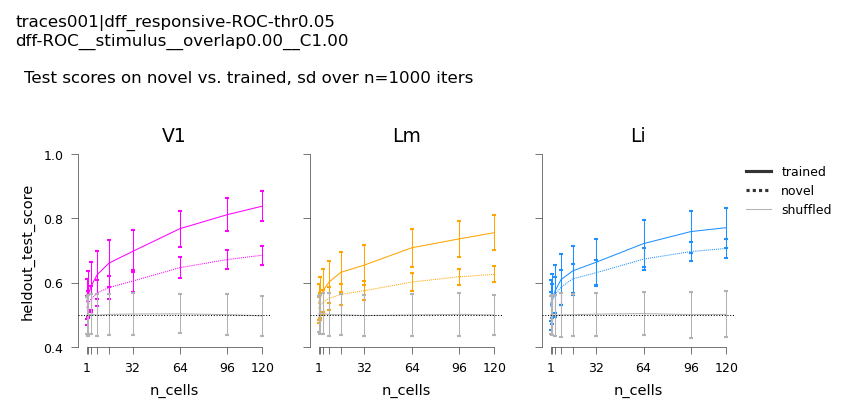

In [645]:
lw=0.5

plotd = mean_df[mean_df['n_cells']<=max_ncells].copy()
# plotd['novel_labels'] = None
# plotd.loc[plotd['novel'], 'novel_labels'] = 'novel'
# plotd.loc[~plotd['novel'], 'novel_labels'] = 'trained'
#cond_colors = {'novel': 'cornflowerblue', 'trained': [0.3]*3}
cond_styles = {'trained': '', 'novel': (1,1)}

%matplotlib inline
metric='heldout_test_score'
if analysis_type=='by_ncells':
    fig, axn = pl.subplots(1,3, figsize=(6., 3), dpi=150, sharex=True, sharey=True)
    for vi, (va, df_) in enumerate(plotd.groupby('visual_area')):
        ai = visual_areas.index(va)
        ax=axn[ai]; ax.set_title(va);
        sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='data'], ax=ax,
                style='novel_labels', dashes=cond_styles, ci='sd', err_style='bars',
                    color=area_colors[va], lw=lw, 
                     err_kws=dict(linewidth=lw, capsize=1))
        sns.lineplot(x='n_cells', y=metric, data=df_[df_.condition=='shuffled'],ax=ax,
                color=[0.7]*3, ci='sd', err_style='bars', label='shuffled', 
                    linestyle='-', lw=lw, 
                     err_kws=dict(linewidth=lw, capsize=1))
        ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
        ax.legend_.remove()
    axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

pl.subplots_adjust(left=0.07, right=0.8, bottom=0.25, top=0.7,
                      wspace=0.2)
for ax in axn:
    ax.set_yticks(np.linspace(0.4, 1, 4))
    ax.set_ylim([0.4,1])
    ax.set_xticks(sample_sizes)
    ax.set_box_aspect(1)
    ax.set_xticklabels([i if i in xlabels else '' for i in sample_sizes])
sns.despine(trim=True)

fig.text(0.01, 0.85, 'Test scores on novel vs. trained, sd over n=%i iters' % n_iters,
        fontsize=8)
pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))

figname = 'trained_v_novel_byncells_max-%i_%s%s' % (max_ncells, aggr_id, overlap_str)
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
pl.savefig(os.path.join(FIGDIR,  '%s.svg' % figname))

print(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [606]:
import scipy.stats as spstats
# spstats.ks_2samp
from itertools import combinations
import statsmodels.stats.multitest as smm
# smm.multipletests
import statsmodels.stats.multicomp as smc
import pingouin as pg

from scipy.stats import kruskal
import scikit_posthocs as sp
from statsmodels.stats.multitest import multipletests


In [607]:
print(max_ncells)

120


In [648]:
maindf = mean_df[mean_df['n_cells']==max_ncells].copy()
maindf.loc[maindf['condition']=='shuffled', 'plot_cond'] = 'A/B shuffled'
maindf.loc[(maindf['condition']=='data')
           & (maindf['novel_labels']=='novel'), 'plot_cond'] = 'novel sizes'
maindf.loc[(maindf['condition']=='data')
           & (maindf['novel_labels']=='trained'), 'plot_cond'] = 'trained sizes'

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/dcode_generalization_MIGR


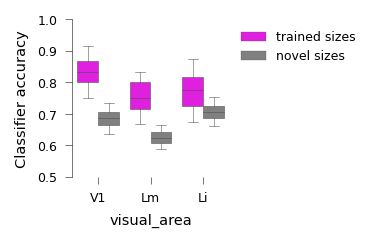

In [677]:
permutation_palette = {'novel sizes': [0.5]*3,
                       'trained sizes': area_colors[va]}
fig, ax = pl.subplots(figsize=(1.75,1.75), dpi=150)
sns.boxplot(x='visual_area', y='heldout_test_score', 
            data=maindf[maindf['condition']=='data'], linewidth=0.25,
            hue='plot_cond', ax=ax, whis=(5, 95), fliersize=0,
            order=visual_areas, palette=permutation_palette) #, color=[0.8]*3)
sns.despine(bottom=True)
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.8)

ax.set_box_aspect(1)
sns.move_legend(ax, bbox_to_anchor=(1,1), loc='upper left', frameon=False,
                title='')
ax.set_label('')
ax.set_ylabel('Classifier accuracy')
ax.set_ylim([0.5, 1])

figname = 'trained_v_novel_max-%i_%s%s' % (max_ncells, aggr_id, overlap_str)
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
pl.savefig(os.path.join(FIGDIR,  '%s.svg' % figname))
print(FIGDIR)

In [610]:
dist1 = maindf[(maindf['condition']=='data')
        & (maindf['novel']==False)
        & (maindf['visual_area']=='Li')]['heldout_test_score']

dist2 = maindf[(maindf['condition']=='data')
        & (maindf['novel']==False)
        & (maindf['visual_area']=='Lm')]['heldout_test_score']

spstats.ks_2samp(dist1, dist2)

KstestResult(statistic=0.171, pvalue=3.5127087833331994e-13, statistic_location=0.7666666666666667, statistic_sign=-1)

In [611]:
len(dist1)

1000

In [615]:
currd = maindf[maindf['condition']=='data'].copy()
vdict = {'V1': 0, 'Lm': 1, 'Li': 2}
currd['va_num'] = [vdict[v] for v in currd['visual_area']]
currd['subject'] = currd['iteration'] + 1000*currd['va_num']

In [616]:
# Perform Mixed ANOVA
anova_results = pg.mixed_anova(data=currd, dv='heldout_test_score', 
                               within='novel_labels', between='visual_area', 
                               subject='subject')
print("Mixed ANOVA Results")
print(anova_results)

# Pairwise Posthoc Tests for Interaction Effects
pairwise_results = pg.pairwise_tests(data=currd, dv='heldout_test_score', 
                                     within='novel_labels', between='visual_area', 
                                     subject='subject')
print("\nPosthoc Pairwise Comparisons")
print(pairwise_results)

# Tukey's HSD for Between-Subjects Factor
tukey_results = smc.pairwise_tukeyhsd(endog=currd['heldout_test_score'], 
                                      groups=currd['visual_area'], alpha=0.05)
print("\nTukey's HSD Results for Group")
print(tukey_results)

Mixed ANOVA Results
         Source         SS  DF1   DF2         MS             F          p-unc  \
0   visual_area   5.232317    2  2997   2.616158   1167.703090   0.000000e+00   
1  novel_labels  19.987414    1  2997  19.987414  12966.242676   0.000000e+00   
2   Interaction   2.086011    2  2997   1.043005    676.618780  3.187082e-243   

        np2  eps  
0  0.437965  NaN  
1  0.812256  1.0  
2  0.311072  NaN  


/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)



Posthoc Pairwise Comparisons
                     Contrast novel_labels      A        B Paired  Parametric  \
0                novel_labels            -  novel  trained   True        True   
1                 visual_area            -     Li       Lm  False        True   
2                 visual_area            -     Li       V1  False        True   
3                 visual_area            -     Lm       V1  False        True   
4  novel_labels * visual_area        novel     Li       Lm  False        True   
5  novel_labels * visual_area        novel     Li       V1  False        True   
6  novel_labels * visual_area        novel     Lm       V1  False        True   
7  novel_labels * visual_area      trained     Li       Lm  False        True   
8  novel_labels * visual_area      trained     Li       V1  False        True   
9  novel_labels * visual_area      trained     Lm       V1  False        True   

           T     dof alternative          p-unc        BF10    hedges  
0 -94.

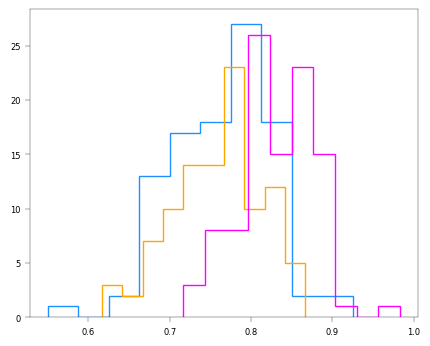

In [617]:
distributions = {}
for va, d_ in currd.groupby('visual_area'):
    distributions.update(
        {va: d_[d_['novel_labels']=='trained']['heldout_test_score'].sample(100)})
fig, ax = pl.subplots()
for v, k in distributions.items():
    ax.hist(k, color=area_colors[v], histtype='step')

In [618]:
# Perform pairwise KS tests
results = []
for (name1, dist1), (name2, dist2) in combinations(distributions.items(), 2):
    ks_stat, p_value = spstats.ks_2samp(dist1, dist2)
    results.append({'Distribution 1': name1, 'Distribution 2': name2,
                    'KS Statistic': ks_stat, 'p-value': p_value})

# Adjust p-values for multiple comparisons using Bonferroni correction
num_tests = len(results)
for result in results:
    result['Bonferroni Corrected p-value'] = min(result['p-value'] * num_tests, 1.0)

# Display results in a DataFrame
results_df = pd.DataFrame(results)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Kolmogorov–Smirnov Test Results", dataframe=results_df)
results_df

,Distribution 1,Distribution 2,KS Statistic,p-value,Bonferroni Corrected p-value
0,Li,Lm,0.12,4.695064e-01,1.000000e+00
1,Li,V1,0.51,3.319419e-12,9.958257e-12
2,Lm,V1,0.54,1.024570e-13,3.073709e-13


In [619]:
# Initialize lists to store results
ks_results = []

# Perform KS test for each area
for N_value, group in currd.groupby('visual_area'):
    a_scores = group[group['novel_labels'] == 'trained']['heldout_test_score']
    b_scores = group[group['novel_labels'] == 'novel']['heldout_test_score']
    stat, p = spstats.ks_2samp(a_scores, b_scores)  # KS test
    ks_results.append({'N': N_value, 'stat': stat, 'p': p})

# Convert results to DataFrame
ks_results = pd.DataFrame(ks_results)

# Apply Multiple Comparisons Correction
# Use FDR or Bonferroni correction
_, p_adjusted, _, _ = smm.multipletests(ks_results['p'], method='fdr_bh')
ks_results['p_adjusted'] = p_adjusted

print(ks_results)

    N   stat              p     p_adjusted
0  Li  0.635  1.187538e-189  1.187538e-189
1  Lm  0.920   0.000000e+00   0.000000e+00
2  V1  0.961   0.000000e+00   0.000000e+00


In [620]:
print(FIGDIR)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/dcode_generalization_MIGR


In [621]:
mean_df['condition'].unique()

array(['data', 'shuffled'], dtype=object)

In [622]:
mean_df.loc[mean_df['novel'], 'novel_labels'] = 'novel'
mean_df.loc[~mean_df['novel'], 'novel_labels'] = 'trained'

In [623]:
# from scipy import stats
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# from statsmodels.stats.multitest import multipletests


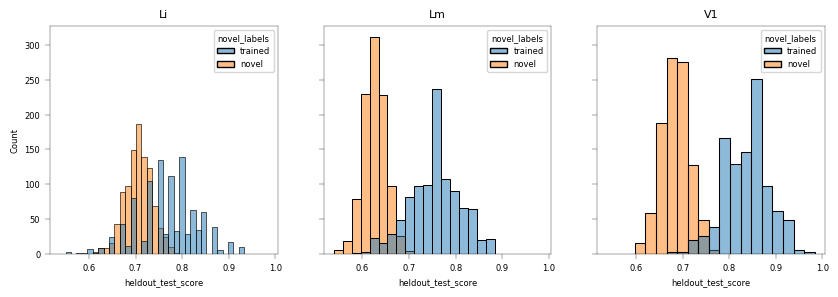

In [624]:
fig, axn =pl.subplots(1, 3, sharex=True, sharey=True, figsize=(10,4))
i = 0
for va, d in currd.groupby('visual_area'):
    ax=axn[i]
    sns.histplot(data=d, x='heldout_test_score', ax=ax, hue='novel_labels')
    ax.set_title(va)
    ax.set_box_aspect(1)
    i+=1

In [625]:
compare_df = currd[['visual_area', 'heldout_test_score', 'novel_labels']]
#perform Kolmogorov-Smirnov test
results = {}
groups = ['V1', 'Lm', 'Li']

for va, d_ in compare_df.groupby('visual_area'):
    print("VISUAL AREA: {} -------------------------------------".format(va))
    ks_stat, p_value = spstats.ks_2samp(
                d_[d_['novel_labels']=='trained']['heldout_test_score'].sample(100, replace=True),
                d_[d_['novel_labels']=='novel']['heldout_test_score'].sample(100, replace=True))
    results["trained vs novel"] = (ks_stat, p_value)

    # Apply Bonferroni correction
    adjusted_p_values = smm.multipletests([r[1] for r in results.values()], method='bonferroni')[1]

    # Print results
    for (comparison, (ks_stat, p)), adj_p in zip(results.items(), adjusted_p_values):
        print(f"{comparison}: KS-stat = {ks_stat:.2f}, p = {p:.2e}, adjusted p = {adj_p:.2e}")

VISUAL AREA: Li -------------------------------------
trained vs novel: KS-stat = 0.56, p = 8.77e-15, adjusted p = 8.77e-15
VISUAL AREA: Lm -------------------------------------
trained vs novel: KS-stat = 0.95, p = 5.60e-50, adjusted p = 5.60e-50
VISUAL AREA: V1 -------------------------------------
trained vs novel: KS-stat = 0.97, p = 2.90e-53, adjusted p = 2.90e-53


In [626]:
aggr_id

'dff-ROC__stimulus__overlap0.00__C1.00'

In [627]:
curr_dst_dir

'/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002'

## Generalization score

In [47]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [48]:
# curr_ncells=128
metric = 'heldout_test_score'
pass_list=[]
for (va, nc), g in mean_df.groupby(['visual_area', 'n_cells']):
    traindf = g[~(g.novel)].sort_values(by='iteration')
    # Get values for all iterations at current NCELLS & COND (500 iters):
    ddf = traindf[traindf.condition=='data'][metric].reset_index(drop=True)
    ddf_s = traindf[traindf.condition=='shuffled'][metric].reset_index(drop=True)
    # Get indices were data > shuffled
    pass_ixs = ddf[ddf>ddf_s].index.to_numpy()
    pass_list.append(g[g.iteration.isin(pass_ixs)])

passdf = pd.concat(pass_list, axis=0)

In [49]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [262]:
metric='heldout_test_score'
curr_ncells = max_ncells
byiter_novel = dec.generalization_score_by_iter(mean_df, max_ncells=curr_ncells)

In [263]:
# Only get scores for n_cells = selected cells
gen_df = byiter_novel[(byiter_novel['n_cells']==curr_ncells)].drop_duplicates()
gen_df.shape

(1500, 18)

<IPython.core.display.Javascript object>


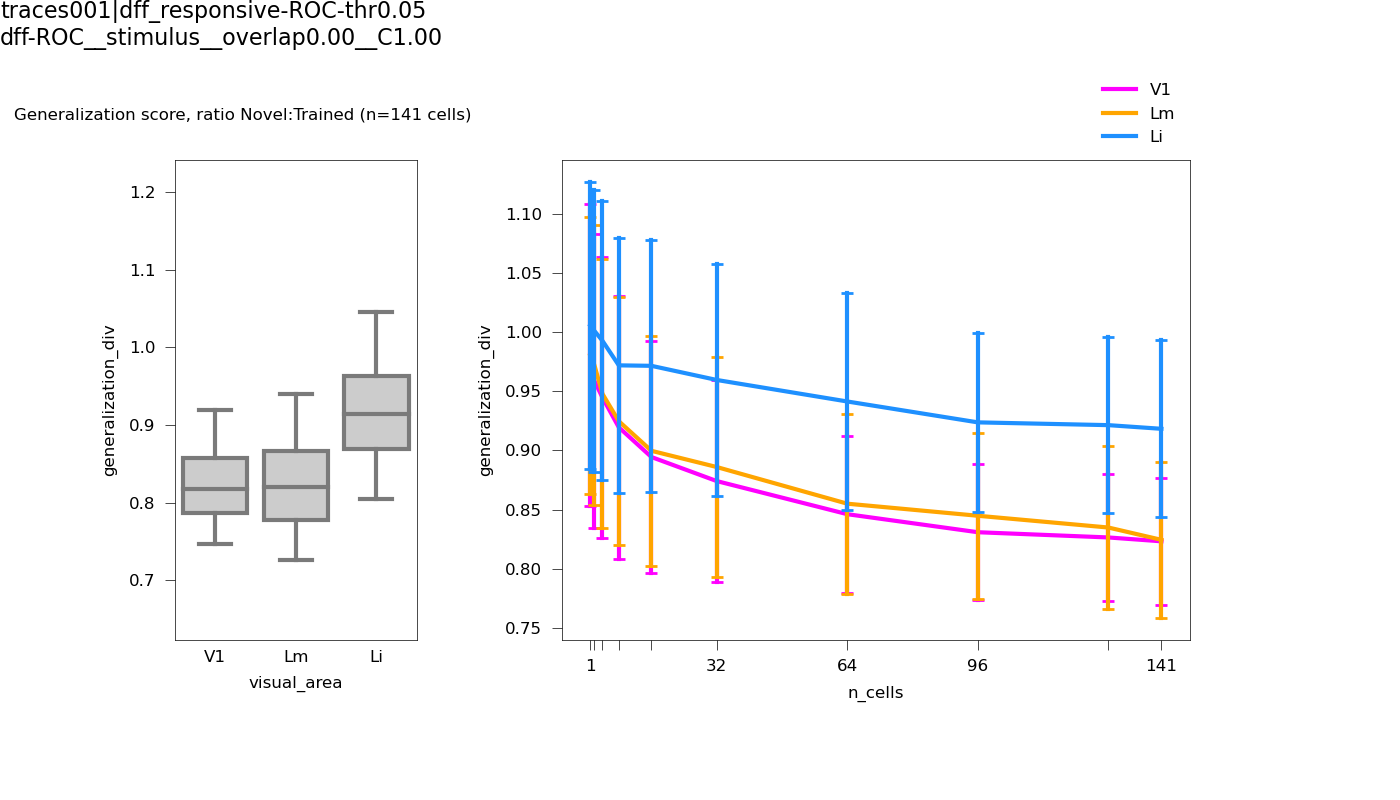

In [264]:
generalization_metric='generalization_div'

multi_comp_test='fdr_bh'
import matplotlib.gridspec as gridspec
fig = pl.figure(figsize=(7,4))
gs = gridspec.GridSpec(1,3) # figsize=(6,3))

ax=fig.add_subplot(gs[0])
sns.boxplot(x='visual_area', y=generalization_metric, 
            data=gen_df, ax=ax, whis=(5, 95), fliersize=0,
            order=visual_areas, color=[0.8]*3)
# ax.set_yticks(np.linspace(0.5, 1, 3))
# ax.set_yticks(np.linspace(0.6, 1.2, 4))
# ax.set_ylim([0.6,1.2])
ax.tick_params(which='both', axis='x', size=0)

ax=fig.add_subplot(gs[1:])
sns.lineplot(x='n_cells', y=generalization_metric, data=byiter_novel, ax=ax, 
             hue='visual_area', ci='sd',err_style='bars', err_kws={'capsize':2},
             palette=area_colors, hue_order=visual_areas)

#ax.set_yticks(np.linspace(0.6, 1.2, 4))
#ax.set_ylim([0.6,1.2])
ax.set_xticks(sample_sizes)
ax.set_xticklabels([i if i in xlabels else '' for i in sample_sizes])
fig.text(0.01, 0.85, 'Generalization score, ratio Novel:Trained (n=%i cells)' \
         % curr_ncells)

# legend
ax.legend(bbox_to_anchor=(1., 1.), loc='lower right', frameon=False,
          title='', markerscale=0.5, fontsize=6)
pl.subplots_adjust(wspace=0.6, right=0.85, top=0.8, bottom=0.2)
pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))

In [270]:
curr_ncells = 128
maindf = mean_df[mean_df['n_cells']==curr_ncells].copy()
generalization_one_sample = dec.generalization_score_by_iter(\
                                maindf, max_ncells=curr_ncells)
generalization_one_sample

,visual_area,condition,iteration,n_cells,novel,heldout_test_score,C,randi,train_transform,test_transform,n_trials,randi_cells,intact,overlap_thr,novel_labels,generalization_norm,generalization_div,generalization_sub
25,Li,data,0,128,True,0.701724,1.0,5783.4,30.0,30.0,58.0,9299.0,1.0,0.0,novel,0.064368,0.935632,0.048276
53,Li,data,1,128,True,0.676316,1.0,3689.4,30.0,30.0,38.0,3934.0,1.0,0.0,novel,0.127334,0.872666,0.098684
81,Li,data,2,128,True,0.648684,1.0,5931.2,30.0,30.0,38.0,3315.0,1.0,0.0,novel,0.189145,0.810855,0.151316
109,Li,data,3,128,True,0.742241,1.0,2827.2,30.0,30.0,58.0,5938.0,1.0,0.0,novel,0.072198,0.927802,0.057759
137,Li,data,4,128,True,0.706579,1.0,5043.2,30.0,30.0,38.0,6924.0,1.0,0.0,novel,-0.009398,1.009398,-0.006579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86875,V1,data,495,128,True,0.669828,1.0,2762.6,30.0,30.0,58.0,6795.0,1.0,0.0,novel,0.241705,0.758295,0.213506
86905,V1,data,496,128,True,0.706897,1.0,3407.6,30.0,30.0,58.0,3.0,1.0,0.0,novel,0.199740,0.800260,0.176437
86935,V1,data,497,128,True,0.735345,1.0,6248.2,30.0,30.0,58.0,3018.0,1.0,0.0,novel,0.134888,0.865112,0.114655
86965,V1,data,498,128,True,0.690517,1.0,3658.4,30.0,30.0,58.0,5816.0,1.0,0.0,novel,0.136853,0.863147,0.109483


In [271]:
mean_df['n_cells'].unique()

array([  1,   2,   4,   8,  16,  32,  64,  96, 128, 141])

In [54]:
import scipy.stats as spstats
from itertools import combinations
import statsmodels.stats.multitest as smm

#### kolmogorov-smirnov test

In [528]:
gen_vals = gen_df[['visual_area', generalization_metric]].copy()
#perform Kolmogorov-Smirnov test
results = {}
groups = ['V1', 'Lm', 'Li']

for group1, group2 in combinations(groups, 2):
    ks_stat, p_value = spstats.ks_2samp(
                gen_vals[gen_vals['visual_area']==group1][generalization_metric], #.sample(20), 
                gen_vals[gen_vals['visual_area']==group2][generalization_metric]) #.sample(20))
    results[f"{group1},{group2}"] = (ks_stat, p_value)

# Apply Bonferroni correction
adjusted_p_values = smm.multipletests([r[1] for r in results.values()], method='bonferroni')[1]

# Print results
true_ks = []
i = 0
for (comparison, (ks_stat, p)), adj_p in zip(results.items(), adjusted_p_values):
    print(f"{comparison}: KS-stat = {ks_stat:.2f}, p = {p:.2e}, adjusted p = {adj_p:.2e}")
    
    ks = pd.DataFrame({'comparison': comparison,
                       'A': comparison.split(',')[0],
                       'B': comparison.split(',')[1],
                         'ks_stat': ks_stat,
                         'p': p,
                         'adjusted_p': adj_p}, index=[i])
    i+=1
    true_ks.append(ks)
true_ks = pd.concat(true_ks)
true_ks

V1,Lm: KS-stat = 0.08, p = 6.93e-02, adjusted p = 2.08e-01
V1,Li: KS-stat = 0.56, p = 1.53e-72, adjusted p = 4.60e-72
Lm,Li: KS-stat = 0.52, p = 1.48e-61, adjusted p = 4.43e-61


In [530]:
importlib.reload(pplot)

<module 'analyze2p.plotting' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/plotting.py'>

In [532]:
%matplotlib notebook

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/dcode_generalization_MIGR


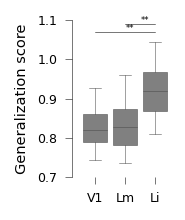

In [680]:
# boxplot: 
# whis=(5, 95) 
# If scalar, whiskers are drawn to the farthest datapoint within whis * IQR from the nearest hinge. 
# If a tuple, it is interpreted as percentiles that whiskers represent.
# fliers: outliers, 1.5*IQR

fig, ax =pl.subplots(figsize=(1.75,1.75), dpi=150)
sns.boxplot(x='visual_area', y=generalization_metric, 
            data=generalization_one_sample, ax=ax, whis=(5, 95), 
            fliersize=0, flierprops={"marker": "."},
            order=visual_areas, color=[0.5]*3, linewidth=0.25)
ax.set_box_aspect(1.75)
ax.set_ylabel("score ratio (novel/trained)")
pplot.annotate_multicomp_by_area(ax, true_ks, p_var='adjusted_p',
                                y_loc=1.05, offset=0.02, fontsize=4, lw=0.25)
ax.set_ylim([0.7, 1.1])
ax.set_xlabel('')
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.8)

sns.despine(bottom=True, trim=True, offset=4)
ax.set_ylabel('Generalization score')

figname = 'generalization_{}'.format(generalization_metric)
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
pl.savefig(os.path.join(FIGDIR,  '%s.svg' % figname))
print(FIGDIR)

In [71]:
gen_shuff = gen_df[['visual_area', generalization_metric]].copy()
gen_shuff['visual_area'] = gen_shuff['visual_area'].sample(frac=1).values
gen_shuff

,visual_area,generalization_div
27,Li,0.935484
55,V1,0.818885
83,V1,0.938088
111,Lm,1.007328
139,Lm,1.000802
...,...,...
86877,Li,0.896552
86907,V1,0.819779
86937,Lm,0.727066
86967,V1,0.866897


#### bootstrap the KS?

In [83]:
gen_shuff = gen_df[['visual_area', generalization_metric]].copy()
i=0
k_ = []
    
for x in range(1000):
    #perform Kolmogorov-Smirnov test
    results = {}
    groups = ['V1', 'Lm', 'Li']

    gen_shuff['visual_area'] = gen_shuff['visual_area'].sample(frac=1, random_state=x).values

    for group1, group2 in combinations(groups, 2):
        ks_stat, p_value = spstats.ks_2samp(
                    gen_shuff[gen_shuff['visual_area']==group1][generalization_metric], 
                    gen_shuff[gen_shuff['visual_area']==group2][generalization_metric])
        results[f"{group1} vs {group2}"] = (ks_stat, p_value)

    # Apply Bonferroni correction
    adjusted_p_values = smm.multipletests([r[1] for r in results.values()], method='bonferroni')[1]

    # Print results
    for (comparison, (ks_stat, p)), adj_p in zip(results.items(), adjusted_p_values):
        #print(f"{comparison}: KS-stat = {ks_stat:.2f}, p = {p:.2e}, adjusted p = {adj_p:.2e}")

        ks = pd.DataFrame({'comparison': comparison,
                     'ks_stat': ks_stat,
                     'p': p,
                     'adjusted_p': adj_p}, index=[i])
        i+=1
        k_.append(ks)
shuff_ks = pd.concat(k_).reset_index(drop=True)

Lm vs Li: 0.0
V1 vs Li: 0.0
V1 vs Lm: 0.183


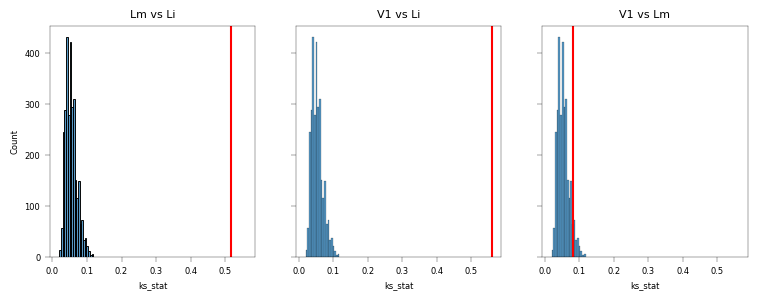

In [85]:
fig, axn = pl.subplots(1,3, figsize=(9,3), sharex=True, sharey=True)

i=0
for comparison, ks_ in shuff_ks.groupby('comparison'):
    ax=axn[i]
    ax.set_title(comparison)
    sns.histplot(data=shuff_ks, x='ks_stat', ax=ax, bins=20)
    tru = float(true_ks[true_ks['comparison']==comparison]['ks_stat'])
    ax.axvline(x=tru, color='r')
    n_above = len(shuff_ks[shuff_ks['ks_stat'] > tru])
    print("{}: {}".format(comparison, n_above/1000))
    i+=1

#### kruskal wallis?

In [384]:
gen_vals = gen_df[['visual_area', generalization_metric]]
print("Kruskal Wallis:")
print(pg.kruskal(data=gen_vals, dv=generalization_metric, between='visual_area'))
# Perform Dunn's post-hoc test with Bonferroni correction
posthoc_results = sp.posthoc_dunn(gen_vals, val_col=generalization_metric, 
                                  group_col='visual_area', p_adjust='bonferroni')
print(posthoc_results)

Kruskal Wallis:
              Source  ddof1           H          p-unc
Kruskal  visual_area      2  471.897978  3.377972e-103
              Li            Lm            V1
Li  1.000000e+00  3.060404e-76  1.194649e-80
Lm  3.060404e-76  1.000000e+00  1.000000e+00
V1  1.194649e-80  1.000000e+00  1.000000e+00


In [385]:
gen_df.groupby('visual_area')[generalization_metric].describe()

,count,mean,std,min,25%,50%,75%,max
visual_area,,,,,,,,
Li,500.0,0.918270,0.074720,0.731302,0.869102,0.914677,0.963158,1.212815
Lm,500.0,0.824446,0.066186,0.651525,0.777748,0.820366,0.866995,1.086207
V1,500.0,0.823212,0.053671,0.696429,0.786552,0.817148,0.858076,1.026063


In [386]:
mean_gen = gen_df.groupby('visual_area').mean()
mean_gen

/tmp/ipykernel_87409/2934735547.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_gen = gen_df.groupby('visual_area').mean()


,iteration,n_cells,novel,heldout_test_score,C,randi,train_transform,test_transform,n_trials,randi_cells,intact,overlap_thr,generalization_norm,generalization_div,generalization_sub
visual_area,,,,,,,,,,,,,,,
Li,249.5,141.0,1.0,0.708589,1.0,5050.4572,30.0,30.0,46.24,5054.006,1.0,0.0,0.081730,0.918270,0.067477
Lm,249.5,141.0,1.0,0.617022,1.0,5012.5104,30.0,30.0,58.00,4832.296,1.0,0.0,0.175554,0.824446,0.135111
V1,249.5,141.0,1.0,0.692086,1.0,4989.2780,30.0,30.0,58.00,4809.996,1.0,0.0,0.176788,0.823212,0.150914


<IPython.core.display.Javascript object>


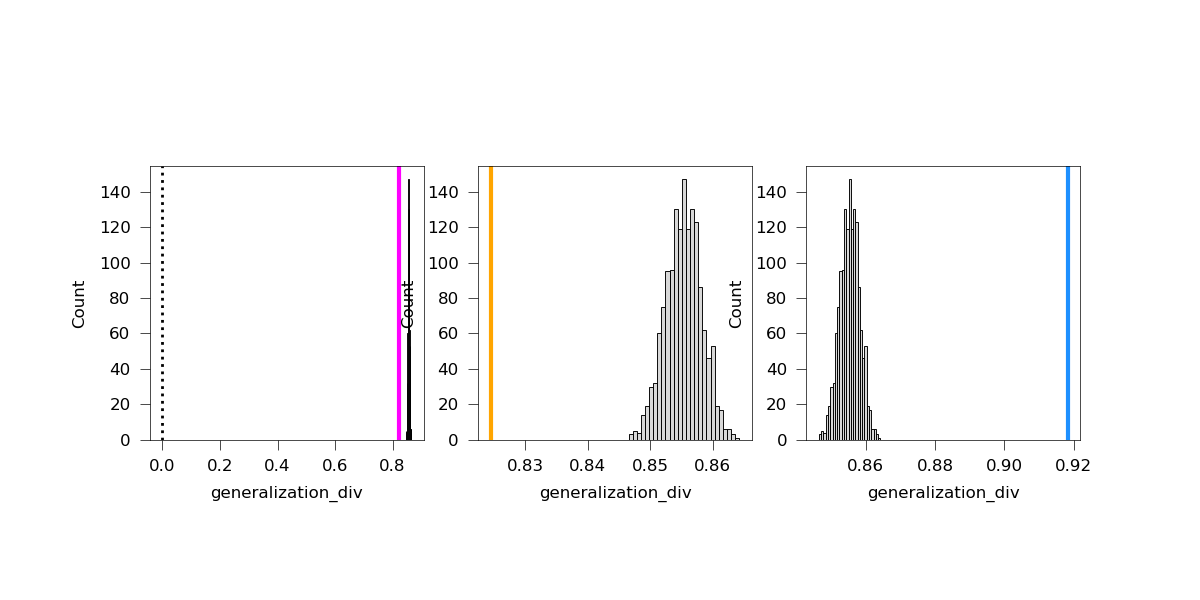

In [408]:
shuff_df = gen_df.copy()
m_list = []
for i in range(500):
    shuff_df['visual_area'] = shuff_df['visual_area'].sample(frac=1, replace=False).values
    m_ = shuff_df.groupby('visual_area')[generalization_metric].mean().reset_index()
    m_list.append(m_)
gen_df_shuffled = pd.concat(m_list)

fig, axn = pl.subplots(1, 3, figsize=(6,3))
for va, vg in gen_df_shuffled.groupby('visual_area'):
    ax=axn[visual_areas.index(va)]
    sns.histplot(x=generalization_metric, data=gen_df_shuffled, ax=ax,
                 color=[0.8]*3, cumulative=False, common_norm=False)
    true_score = mean_gen.loc[va][generalization_metric]
    ax.axvline(x=true_score, color=area_colors[va])
    ax.set_box_aspect(1)
    
#     shuff_dist = np.array(sorted(vg[generalization_metric].values))
#     n_extreme = len(np.where(shuff_dist>=true_score)[0])
#     pv = n_extreme/len(shuff_dist)
#     if pv<0.05:
#         sig_str='**' if pv<0.01 else '*'
#     else:
#         sig_str='n.s.'
#     if vi==2:
#         legh = pplot.custom_legend_markers(colors=['r', [0.4]*3], 
#                                     labels=['true diffs', 'shuffled'], 
#                                     use_patch=True, alpha=0.5)
#         ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
#     #ax.axvline(x=true_diff, ls='-', c='r', lw=2)
#     ax.set_title('%s (%s, p=%.2f)' % (va, sig_str, pv),
#                  loc='left', fontsize=7)
    

## Shuffle trained and novel labels for iterdf (visual_area label intact)

In [39]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [106]:
curr_ncells = 120
print(max_ncells)
data_ = iterdf[(iterdf.n_cells==curr_ncells) & (iterdf.condition=='data')].copy()

141


In [71]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [72]:
def trained_minus_novel_on_current_iter(df, shuffle=False):
    d_ = df.copy()
    if shuffle:
        d_['novel'] = d_['novel'].sample(frac=1).values
#     differences = [float(tdf[tdf['novel']==False]['heldout_test_score'] \
#                       - tdf[tdf['novel']==True]['heldout_test_score'].mean()) \
#                    for t, tdf in d_.groupby('train_transform')]
    mean_diff = d_[d_['novel']==False]['heldout_test_score'].mean() \
                - d_[d_['novel']==True]['heldout_test_score'].mean()

    return mean_diff #np.mean(differences)

In [73]:
for i, d_ in data_.groupby(['visual_area', 'condition', 'iteration']):
    d_

In [169]:
mean_differences = data_.groupby(['visual_area', 'condition', 'iteration'])\
                        .apply(trained_minus_novel_on_current_iter).reset_index()\
                        .rename(columns={0: 'trained_minus_novel'})
true_means = mean_differences.groupby('visual_area')['trained_minus_novel'].mean()
true_means

visual_area
Li    0.064351
Lm    0.129621
V1    0.152329
Name: trained_minus_novel, dtype: float64

In [191]:
V1_shuff = data_[data_['visual_area']=='V1'].groupby(['iteration'])\
                .apply(trained_minus_novel_on_current_iter, shuffle=True)
Lm_shuff = data_[data_['visual_area']=='Lm'].groupby(['iteration'])\
                .apply(trained_minus_novel_on_current_iter, shuffle=True)
Li_shuff = data_[data_['visual_area']=='Li'].groupby(['iteration'])\
                .apply(trained_minus_novel_on_current_iter, shuffle=True)
# combine
mean_differences_shuff = data_.groupby(['visual_area', 'iteration'])\
                   .apply(trained_minus_novel_on_current_iter, shuffle=True)\
                    .reset_index().rename(columns={0: 'trained_minus_novel'})
mean_differences_shuff['permutation'] = 'shuffled'
mean_differences['permutation'] = 'true'

In [192]:
mean_diffs_combined = pd.concat([mean_differences, mean_differences_shuff],
                                axis=0, ignore_index=True)
# mean_diffs_combined

In [200]:
shuff_ = mean_diffs_combined[(mean_diffs_combined['visual_area']=='Li')
            & (mean_diffs_combined['permutation']=='shuffled')]['trained_minus_novel']
len(shuff_[shuff_>=true_means.loc['Li']])/len(shuff_)

0.116

In [207]:
# shuff_dist = np.array(shuff_dist)
shuff_dist = vg[vg.permutation=='shuffled']['trained_minus_novel']
len(shuff_dist[shuff_dist>=true_means.loc['Li']])/len(shuff_dist)

0.22

<IPython.core.display.Javascript object>


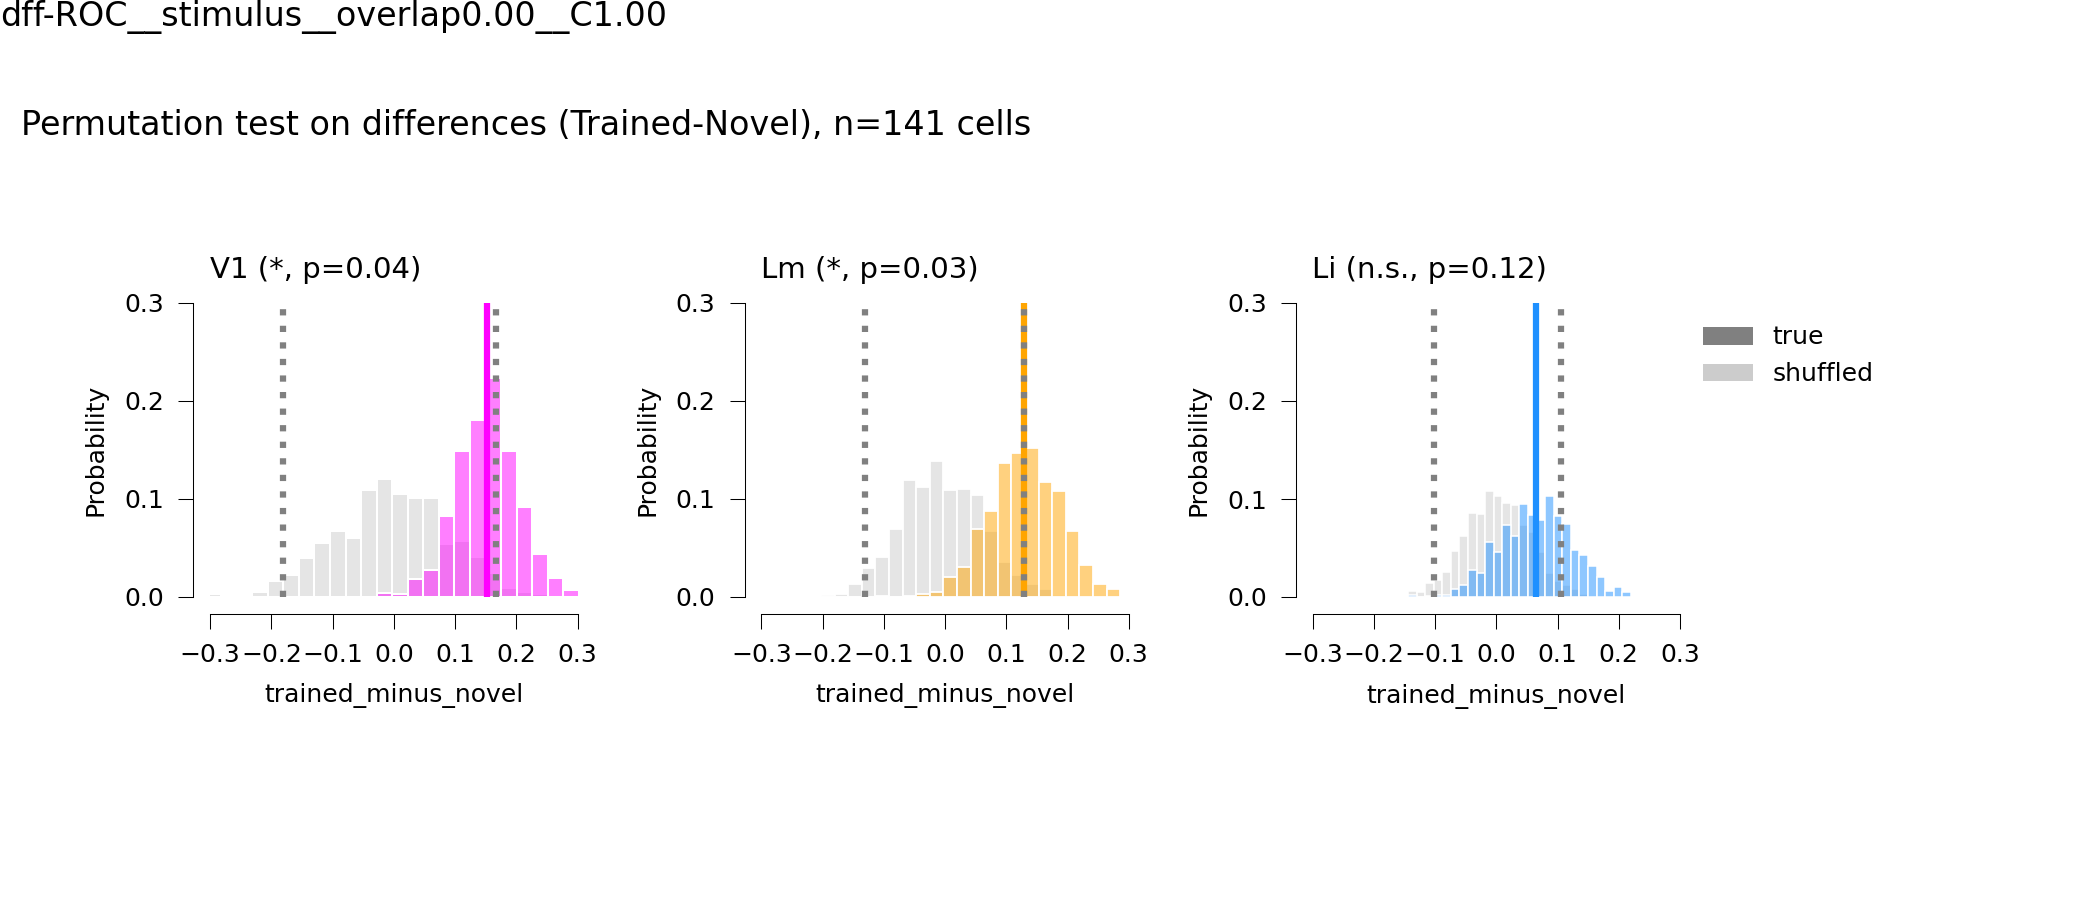

|    | visual_area   |   p-val |
|---:|:--------------|--------:|
|  0 | Li            |   0.116 |
|  1 | Lm            |   0.025 |
|  2 | V1            |   0.038 |
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002 permutation_test_trained-v-novel-diffs


In [208]:
shuff_color=[0.8]*3
s_=[]
fig, axn = pl.subplots(1,3, figsize=(7, 3), sharex=True, sharey=False, dpi=150)
for vi, (va, vg) in enumerate(mean_diffs_combined.groupby('visual_area')):
    ax=axn[visual_areas.index(va)]
    sns.histplot(x='trained_minus_novel', hue='permutation', data=vg, ax=ax, alpha=0.5,
                palette={'shuffled': shuff_color, 'true': area_colors[va]},
                 stat='probability', legend=True,edgecolor='w', common_norm=False)
    tru_mean = true_means.loc[va] #['trained_minus_novel']
    ax.axvline(x=tru_mean, color=area_colors[va])
    shuff_dist = vg[vg.permutation=='shuffled']['trained_minus_novel']
#     n_greater = len(np.where(shuff_dist>=meas_mean)[0])
    pv = len(shuff_dist[shuff_dist>=tru_mean])/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    ax.set_title('%s (%s, p=%.2f)' % (va, sig_str, pv), loc='left', fontsize=7)
    stat_ = pd.Series({'visual_area': va, 'p-val': pv})
    s_.append(stat_)
    c_lo, c_hi = hutils.get_empirical_ci(shuff_dist)
    ax.axvline(x=c_lo, color=[0.5]*3, ls=':')
    ax.axvline(x=c_hi, color=[0.5]*3, ls=':')
    
    if va=='Li':
        leg_h = pplot.custom_legend_markers(colors=[[0.5]*3, shuff_color],
                                           labels=['true', 'shuffled'], 
                                           use_patch=True)
        ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False,
                 title=None)
    else:
        ax.legend_.remove()
    #ax.set_ylim([0, 0.12])
    ax.set_xlim([-0.3, 0.3])
    ax.set_xticks(np.linspace(-0.3, 0.3, 7))
    ax.set_yticks(np.linspace(0, 0.3, 4))
    ax.set_yticks(np.linspace(0, 0.3, 4))
    ax.set_box_aspect(0.8)
sns.despine(trim=True, offset=4)
statdf = pd.concat(s_, axis=1).T
print(statdf.to_markdown())

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.25, top=0.75,
                  wspace=0.5)

fig.text(0.01, 0.85,\
         "Permutation test on differences (Trained-Novel), n=%i cells" \
         % max_ncells, fontsize=8)

pplot.label_figure(fig, aggr_id)
figname = 'permutation_test_trained-v-novel-diffs'
# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
print(curr_dst_dir, figname)

<IPython.core.display.Javascript object>


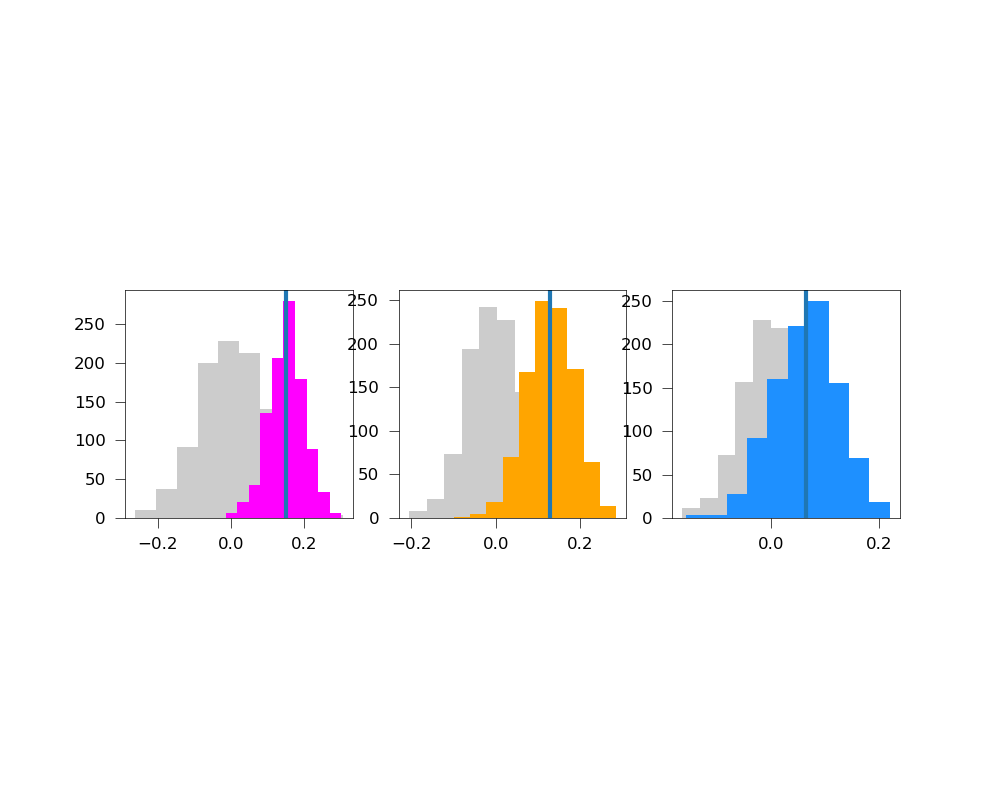

In [195]:
fig, axn = pl.subplots(1,3)
for i, (va, vshuff) in enumerate(zip(visual_areas, [V1_shuff, Lm_shuff, Li_shuff])):
    ax=axn[i]
    ax.hist(vshuff, color=[0.8]*3)
    ax.hist(mean_differences[mean_differences['visual_area']==va]['trained_minus_novel'],
            color=area_colors[va])
    ax.axvline(x=true_mean_differences.loc[va])
    ax.set_box_aspect(1)

In [155]:
len(V1_shuff[V1_shuff>=mean_differences.loc['V1']])/len(V1_shuff)

0.045

In [156]:
len(Lm_shuff[Lm_shuff>=mean_differences.loc['Lm']])/len(V1_shuff)

0.026

In [157]:
len(Li_shuff[Li_shuff>=mean_differences.loc['Li']])/len(V1_shuff)

0.099

In [68]:
dist1 = differences[differences['visual_area']==va]['trained_minus_novel']
dist2 = V1_shuff.copy()
ks_stat, p_value = spstats.ks_2samp(dist1, dist2)
print(ks_stat, p_value) 

# # Perform pairwise KS tests
# results = []
# for (name1, dist1), (name2, dist2) in combinations(distributions.items(), 2):
#     ks_stat, p_value = spstats.ks_2samp(dist1, dist2)
#     results.append({'Distribution 1': name1, 'Distribution 2': name2,
#                     'KS Statistic': ks_stat, 'p-value': p_value})

# # Adjust p-values for multiple comparisons using Bonferroni correction
# num_tests = len(results)
# for result in results:
#     result['Bonferroni Corrected p-value'] = min(result['p-value'] * num_tests, 1.0)

# # Display results in a DataFrame
# results_df = pd.DataFrame(results)
# # import ace_tools as tools; tools.display_dataframe_to_user(name="Kolmogorov–Smirnov Test Results", dataframe=results_df)
# results_df

0.398 9.341018516430365e-36


  visual_area  p-val
1          Lm  0.025
  visual_area  p-val
2          V1  0.038
/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.002 permutation_test_diff_boxplot


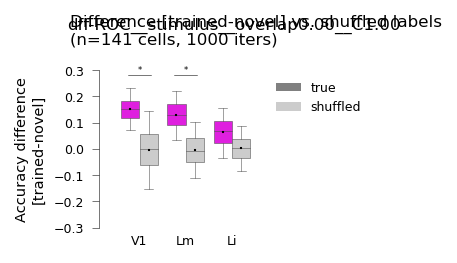

In [685]:
shuff_color=[0.8]*3
fig, ax = pl.subplots(figsize=(1.75,1.75), dpi=150)
sns.boxplot(x='visual_area', y='trained_minus_novel', data=mean_diffs_combined, ax=ax,
            order=visual_areas, hue='permutation', 
            palette={'shuffled': shuff_color, 'true': area_colors[va]},
           fliersize=0, linewidth=0.25, whis=[5, 95],
            showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "1"})
ax.set_box_aspect(1)
ax.set_ylim([-0.3, 0.3])
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.8)

sns.despine(bottom=True, offset=4)
ax.tick_params(which='both', axis='x', size=0)
ax.set_xlabel('')
ax.set_ylabel('Accuracy difference\n[trained-novel]')
for bi, va in zip(np.arange(0, len(ax.artists))[0::2], visual_areas):
    bx = ax.artists[bi]
    bx.set_facecolor(area_colors[va])
# stats
pplot.annotate_sig_on_paired_plot(ax, mean_diffs_combined, statdf, 'trained_minus_novel', 
                            offset=-0.02, h=0.00, lw=0.25, stat='p-val', fontsize=4)
# legend    
leg_h = pplot.custom_legend_markers(colors=[[0.5]*3, shuff_color],
                                   labels=['true', 'shuffled'], use_patch=True)
ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False,
         title=None)
fig.text(0.01, 0.9, \
    'Difference [trained-novel] vs. shuffled labels\n(n=%i cells, %i iters)' % (curr_ncells, n_iters),\
         fontsize=8)

pplot.label_figure(fig, aggr_id)
figname = 'permutation_test_diff_boxplot'
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
pl.savefig(os.path.join(FIGDIR, '%s.svg' % figname))
print(curr_dst_dir, figname)

# Shuffle visual area labels

#### Calculate "generalization score"

In [459]:
curr_ncells = 141

In [369]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

In [405]:
data_ = iterdf[(iterdf.n_cells==curr_ncells) ].copy() #& (iterdf.condition=='data')].copy()

# Average scores for novel conditions vs. trained conditions:
data_scores = dec.average_within_iterations_by_ncells(data_,
                        analysis_type=analysis_type, test_type=test_type,
                        grouper=['visual_area', 'condition', 'iteration'])
# Get true diffs
diff_scores = dec.calculate_difference_scores(
                        data_scores,
                        metric_name=metric_name)
diff_scores_mean = diff_scores.groupby('visual_area').mean()
# true_diff_mean.loc['V1']
diff_scores_mean

,n_cells,iteration,ratio
visual_area,,,
Li,141.0,249.5,0.918270
Lm,141.0,249.5,0.824446
V1,141.0,249.5,0.823212


In [371]:
# diffs = dec.permutation_test_trained_v_novel(data_)

In [372]:
shuff_df = itershuff[(itershuff.n_cells==curr_ncells) ] #& (itershuff.condition=='data')].copy()
shuff_scores = dec.average_within_iterations_by_ncells(shuff_df, 
                                analysis_type='by_ncells',
                                test_type='size_single',
                                grouper=['visual_area', 'condition', 'iteration'])
diff_scores_shuff = dec.calculate_difference_scores(shuff_scores[shuff_scores['condition']=='data'],
                                            metric_name=metric_name)

In [373]:
data_scores['permutation']='true'
shuff_scores['permutation']='shuffled'
all_scores = pd.concat([data_scores[data_scores['condition']=='data'], 
                       shuff_scores[shuff_scores['condition']=='data']], axis=0)

<IPython.core.display.Javascript object>


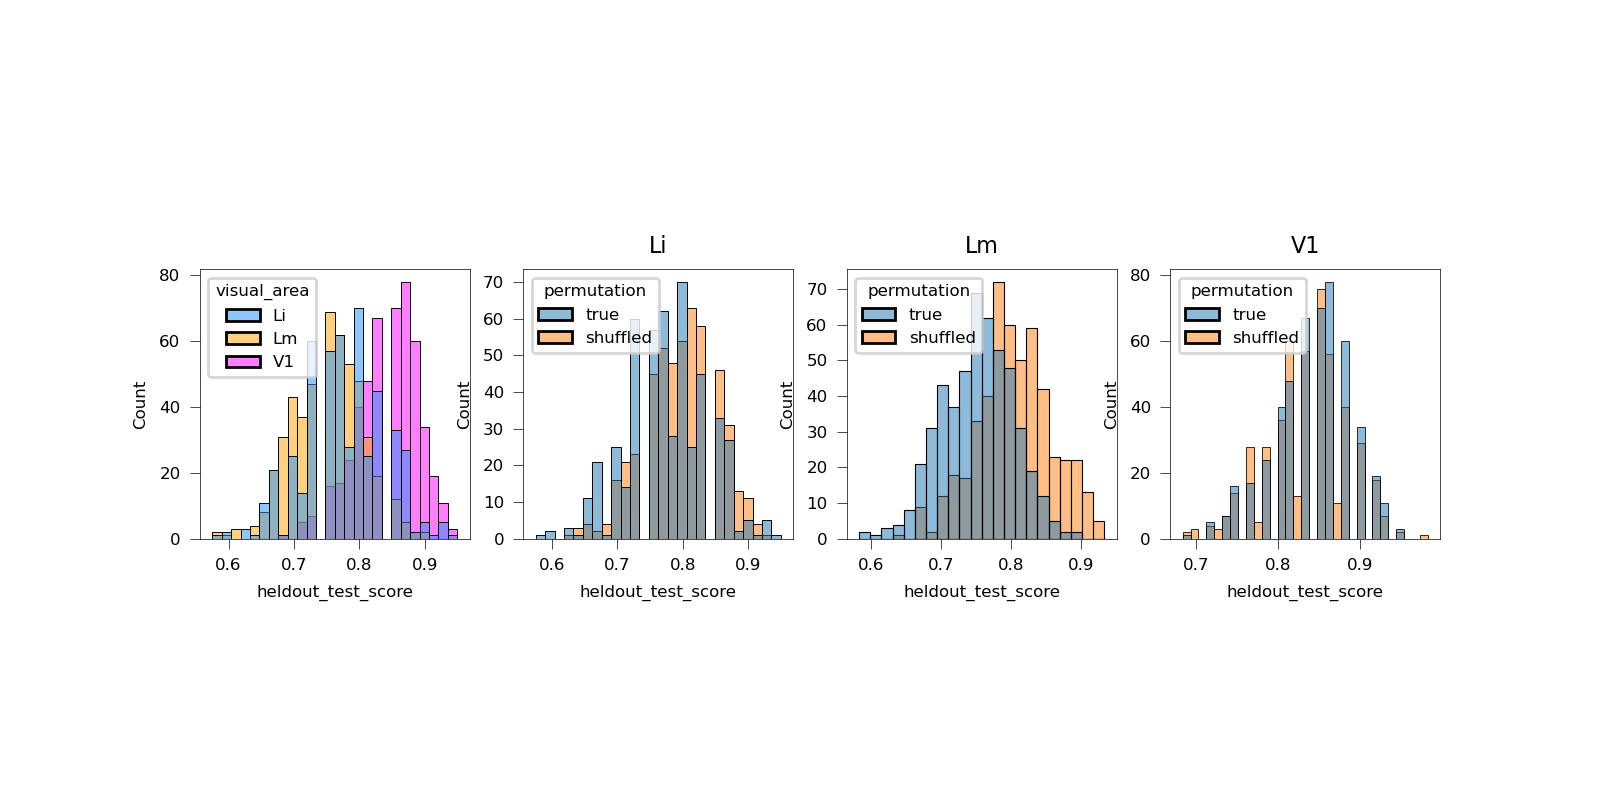

In [374]:
fig, axn = pl.subplots(1,4, figsize=(8,4))
ax=axn[0]
plotd = all_scores[ (all_scores['novel']==False) 
                  & (all_scores['permutation']=='true')]
sns.histplot(data=plotd, x='heldout_test_score',ax=ax,
            hue='visual_area', palette=area_colors)
ax.set_box_aspect(1)
for vi, (va, sd) in enumerate(all_scores.groupby('visual_area')):
    ax=axn[vi+1]
    sns.histplot(data=sd[sd['novel']==False], x='heldout_test_score',
            hue='permutation', ax=ax)
    ax.set_box_aspect(1)
    ax.set_title(va)

In [473]:
va = 'Lm'
dist1 = all_scores[(all_scores['visual_area']==va)
            & (all_scores['novel']==False)
            & (all_scores['permutation']=='true')]['heldout_test_score'] #.sample(100)
dist2 = all_scores[(all_scores['visual_area']==va)
            & (all_scores['novel']==False)
            & (all_scores['permutation']=='shuffled')]['heldout_test_score'] #.sample(100)
spstats.ks_2samp(dist1, dist2)

KstestResult(statistic=0.392, pvalue=1.1419220376452788e-34, statistic_location=0.7666666666666667, statistic_sign=1)

In [499]:
dist1 = data_scores[(data_scores['visual_area']=='V1')]['heldout_test_score'].sample(20)
dist2 = data_scores[(data_scores['visual_area']=='Li')]['heldout_test_score'].sample(20)
spstats.ks_2samp(dist1, dist2)

KstestResult(statistic=0.25, pvalue=0.571336004933722, statistic_location=0.6666666666666667, statistic_sign=1)

In [460]:
# curr_ncells = 128
# maindf = mean_df[mean_df['n_cells']==curr_ncells].copy()
gen_true = dec.generalization_score_by_iter(\
                                data_scores, max_ncells=curr_ncells)
gen_true_means = gen_true.groupby('visual_area').mean()
gen_true_means

,iteration,n_cells,novel,heldout_test_score,C,randi,train_transform,test_transform,n_trials,randi_cells,intact,overlap_thr,generalization_norm,generalization_div,generalization_sub
visual_area,,,,,,,,,,,,,,,
Li,249.5,141.0,1.0,0.708589,1.0,5050.4572,30.0,30.0,46.24,5054.006,1.0,0.0,0.081730,0.918270,0.067477
Lm,249.5,141.0,1.0,0.617022,1.0,5012.5104,30.0,30.0,58.00,4832.296,1.0,0.0,0.175554,0.824446,0.135111
V1,249.5,141.0,1.0,0.692086,1.0,4989.2780,30.0,30.0,58.00,4809.996,1.0,0.0,0.176788,0.823212,0.150914


In [462]:
gen_shuff = dec.generalization_score_by_iter(\
                                shuff_scores, max_ncells=curr_ncells)


In [468]:
va = 'Li'
curr_vals = gen_shuff[gen_shuff['visual_area']==va]['generalization_div']
tru_val = gen_true_means.loc[va]['generalization_div']
len(curr_vals[curr_vals>=tru_val])/len(curr_vals)

0.128

<IPython.core.display.Javascript object>


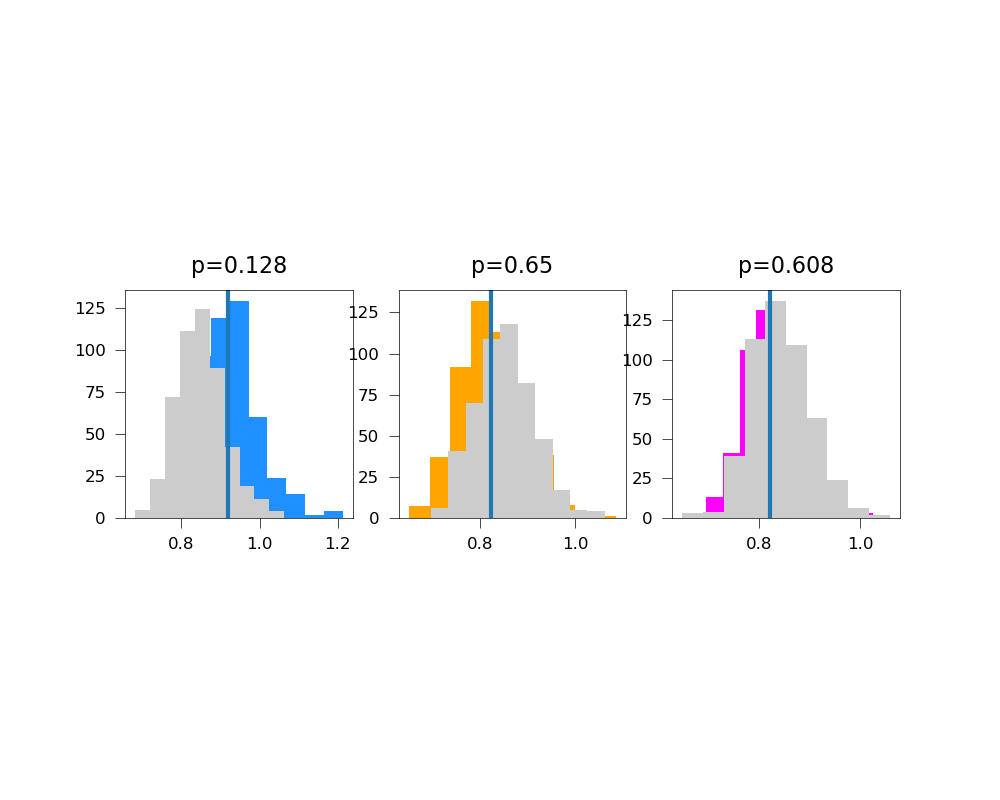

In [461]:
va='Li'
fig, axn =pl.subplots(1, 3)
for vi, (va, scores_) in enumerate(diff_scores.groupby('visual_area')):
    ax=axn[vi]
    ax.hist(scores_[metric_name],
            color=area_colors[va])
    shuff_vals = diff_scores_shuff[diff_scores_shuff['visual_area']==va][metric_name]
    ax.hist(shuff_vals,color=[0.8]*3)
    tru_val = diff_scores_mean.loc[va][metric_name]
    pval = len(shuff_vals[shuff_vals>=tru_val])/len(shuff_vals)
    ax.set_title('p={}'.format(pval))
    ax.axvline(x=tru_val)
    ax.set_box_aspect(1)

In [376]:
diff_scores['permutation'] = 'true'
diff_scores_shuff['permutation'] = 'shuffled'
diff_scores_combined = pd.concat([diff_scores, diff_scores_shuff], 
                                 axis=0)

<IPython.core.display.Javascript object>


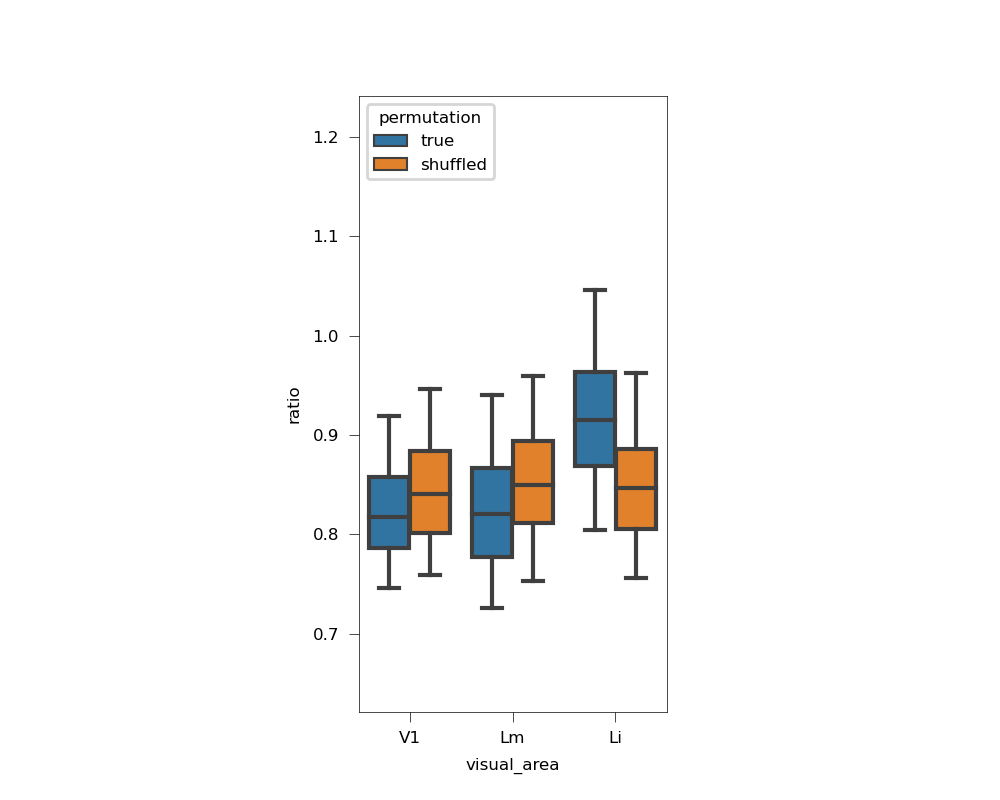

In [377]:
fig, ax = pl.subplots()
sns.boxplot(data=diff_scores_combined, x='visual_area', order=visual_areas,
            y=metric_name, hue='permutation', ax=ax, 
            fliersize=0, whis=(5, 95))
# sns.boxplot(data=diff_scores, x='visual_area', order=visual_areas,
#             y=metric_name, ax=ax, fliersize=0) #, whis=(5, 95))
ax.set_box_aspect(2)

In [458]:
va = 'V1'
dist1 = diff_scores_combined[(diff_scores_combined['visual_area']==va)
            & (diff_scores_combined['permutation']=='true')][metric_name].sample(500)
dist2 = diff_scores_combined[(diff_scores_combined['visual_area']==va)
            & (diff_scores_combined['permutation']=='shuffled')][metric_name].sample(500)
spstats.ks_2samp(dist1, dist2)

KstestResult(statistic=0.182, pvalue=1.1893503543157425e-07, statistic_location=0.8420689655172414, statistic_sign=1)

In [413]:
pg.mwu(dist1, dist2)

,U-val,alternative,p-val,RBC,CLES
MWU,3869.5,two-sided,0.005762,0.2261,0.38695


In [217]:
# Perform pairwise KS tests
results = []
for va, vdf in diffs.groupby('visual_area'):
    dist1 = vdf[vdf['trained_v_novel']=='true']['difference']
    dist2 = vdf[vdf['trained_v_novel']=='shuffled']['difference']
    ks_stat, p_value = spstats.ks_2samp(dist1, dist2)
    results.append({'Distribution 1': 'true', 'Distribution 2': 'shuffled',
                    'KS Statistic': ks_stat, 'p-value': p_value,
                   'visual_area': va})
pd.DataFrame(results)

,Distribution 1,Distribution 2,KS Statistic,p-value,visual_area
0,true,shuffled,0.0,1.0,Li
1,true,shuffled,0.0,1.0,Lm
2,true,shuffled,0.0,1.0,V1


In [45]:
# def calculate_difference_scores(byiter_data):
#     cols = ['visual_area', 'n_cells', 'iteration'] #, 'train_transform', 'test_transform']
#     diffdf = byiter_data[cols].copy().reset_index(drop=True).drop_duplicates()
#     diffdf = diffdf.sort_values(by=['iteration', 'visual_area'])

#     byiter_data = byiter_data.sort_values(by=['iteration', 'visual_area'])
#     true_diffs = byiter_data[(~byiter_data.novel)]['heldout_test_score'].values\
#                 - byiter_data[(byiter_data.novel)]['heldout_test_score'].values
#     diffdf['difference'] = true_diffs
    
#     return diffdf

In [46]:
itershuff.n_cells.unique()

array([  4,  94,  73,   2,  16,  96,   1, 120,  64, 128,  32, 141,   8])

In [122]:
print(curr_ncells)
itershuff[(itershuff.n_cells==curr_ncells) & (itershuff.condition=='data')]

120


,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
195000,0.003351,0.000298,0.626667,1.0,0.416667,1.0,6758,data,10.0,10.0,58,False,0,120,4774,Li,aggregate,True,intact,0
195002,0.003351,0.000298,0.626667,1.0,0.586207,1.0,6758,data,10.0,20.0,58,True,0,120,4774,Li,aggregate,True,intact,0
195003,0.003351,0.000298,0.626667,1.0,0.586207,1.0,6758,data,10.0,30.0,58,True,0,120,4774,Li,aggregate,True,intact,0
195004,0.003351,0.000298,0.626667,1.0,0.603448,1.0,6758,data,10.0,40.0,58,True,0,120,4774,Li,aggregate,True,intact,0
195005,0.003351,0.000298,0.626667,1.0,0.620690,1.0,6758,data,10.0,50.0,58,True,0,120,4774,Li,aggregate,True,intact,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779994,0.000788,0.000340,1.000000,1.0,1.000000,1.0,8946,data,50.0,50.0,58,False,749,120,5224,V1,aggregate,True,intact,0
779996,0.000788,0.000340,1.000000,1.0,0.482759,1.0,8946,data,50.0,10.0,58,True,749,120,5224,V1,aggregate,True,intact,0
779997,0.000788,0.000340,1.000000,1.0,0.724138,1.0,8946,data,50.0,20.0,58,True,749,120,5224,V1,aggregate,True,intact,0
779998,0.000788,0.000340,1.000000,1.0,0.793103,1.0,8946,data,50.0,30.0,58,True,749,120,5224,V1,aggregate,True,intact,0


In [123]:
importlib.reload(dec)

<module 'analyze2p.decoding' from '/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py'>

(75000, 20)


Text(0.01, 0.9, 'Test scores on TRAINED vs. NOVEL, metric=ratio')

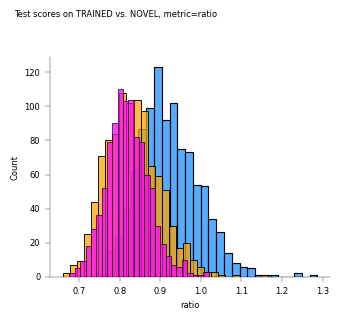

In [124]:
# curr_ncells=94 #max_ncells #128
metric_name = 'ratio'
data_df = iterdf[(iterdf.n_cells==curr_ncells) & (iterdf.condition=='data')].copy()
print(data_df.shape)
data_scores = dec.average_within_iterations_by_ncells(data_df, 
                                analysis_type='by_ncells',
                                test_type='size_single',
                                grouper=['visual_area', 'condition', 'iteration'])
diff_scores = dec.calculate_difference_scores(data_scores,
                                              metric_name=metric_name
                                             )
fg = sns.FacetGrid(data=diff_scores, height=4, 
                  hue='visual_area', palette=area_colors)
fg.map(sns.histplot, metric_name)
ax.axvline(x=0, ls=':', c='k', lw=1)

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.25, top=0.8)
fg.fig.text(0.01, 0.9, 'Test scores on TRAINED vs. NOVEL, metric={}'.format(metric_name))

Text(0.01, 0.9, 'Test scores on TRAINED - test scores on NOVEL')

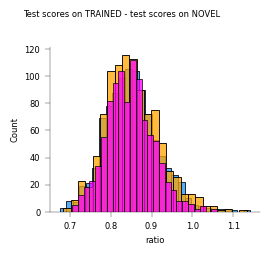

In [125]:
metric_name = 'ratio'
shuff_df = itershuff[(itershuff.n_cells==curr_ncells) & (itershuff.condition=='data')].copy()
shuff_scores = dec.average_within_iterations_by_ncells(shuff_df, 
                                analysis_type='by_ncells',
                                test_type='size_single',
                                grouper=['visual_area', 'condition', 'iteration'])
diff_scores_shuff = dec.calculate_difference_scores(shuff_scores,
                                            metric_name=metric_name)

fg = sns.FacetGrid(data=diff_scores_shuff, height=3, 
                  hue='visual_area', palette=area_colors)
fg.map(sns.histplot, metric_name)
ax.axvline(x=0, ls=':', c='k', lw=1)

pl.subplots_adjust(left=0.1, right=0.8, bottom=0.25, top=0.8)
fg.fig.text(0.01, 0.9, 'Test scores on TRAINED - test scores on NOVEL')

In [126]:
import itertools

import statsmodels.stats.multitest as smulti

import pingouin as pg
import scipy.stats as spstats

In [127]:
diff_scores.shape, diff_scores_shuff.shape #.reload(pplot)

((3000, 4), (3000, 4))

In [128]:
diff_scores['condition'] = 'true'
diff_scores_shuff['condition'] = 'shuffled'
DIFFS = pd.concat([diff_scores, diff_scores_shuff], axis=0, ignore_index=True)
DIFFS.head()

,visual_area,n_cells,iteration,ratio,condition
0,Li,120,0,0.881579,true
1,Li,120,1,0.863476,true
2,Li,120,2,0.978947,true
3,Li,120,3,0.855032,true
4,Li,120,4,0.839198,true


In [140]:
diff_scores_mean = diff_scores.groupby('visual_area').mean()
diff_scores_mean

,n_cells,iteration,ratio
visual_area,,,
Li,120.0,499.5,0.921654
Lm,120.0,499.5,0.832452
V1,120.0,499.5,0.820243


<IPython.core.display.Javascript object>


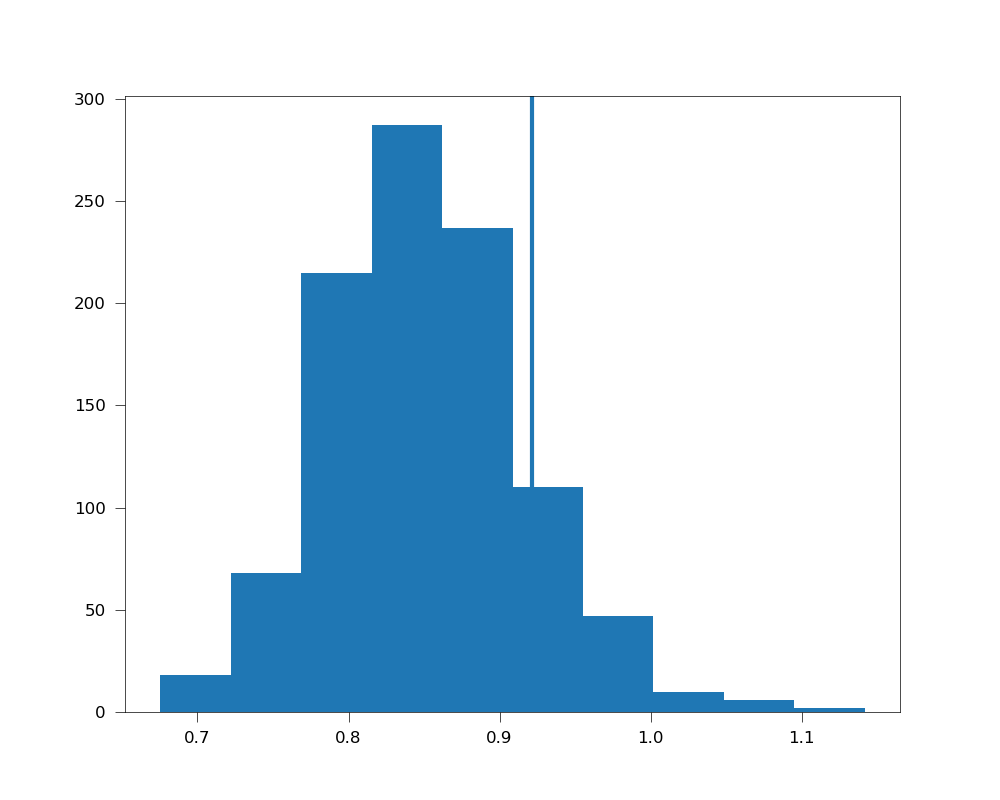

0.14


In [154]:
va = 'Li'
vals = DIFFS[(DIFFS['visual_area']==va) 
          & (DIFFS['condition']=='shuffled')][metric_name]
fig, ax = pl.subplots()
ax.hist(vals)
ax.axvline(x=diff_scores_mean.loc[va][metric_name])
tru = diff_scores_mean.loc[va][metric_name]
print(len(vals[vals>=tru])/1000)

In [129]:
v_combos = list(itertools.combinations(visual_areas, 2))
df_list=[]
for vi, (v1, v2) in enumerate(v_combos):
    # Original diff. distributions
    for shuffcond, diffs in DIFFS.groupby('condition'):
        curr_scores = diffs[diffs.visual_area.isin([v1, v2])].copy()
        v1_df = curr_scores[curr_scores.visual_area==v1]\
                [['iteration', 'visual_area', metric_name]].copy()
        v2_df = curr_scores[curr_scores.visual_area==v2]\
                [['iteration', 'visual_area', metric_name]].copy()
        diffs_ = pd.merge(v1_df, v2_df, on=['iteration'], how='outer',
                          suffixes=('_%s' % v1, '_%s' % v2))
        diffs_[metric_name] = diffs_['%s_%s' % (metric_name, v1)] \
                                - diffs_['%s_%s' % (metric_name, v2)]
        true_diff = diffs_[metric_name].mean()
        diffs_['condition'] = shuffcond
        diffs_['area_pair'] = '%s_%s' % (v1, v2)
        df_list.append(diffs_[['area_pair', 'iteration', 'condition', metric_name]])

diff_v_shuff = pd.concat(df_list, axis=0, ignore_index=True)
diff_v_shuff.shape

(6000, 4)

In [130]:
DIFFS

,visual_area,n_cells,iteration,ratio,condition
0,Li,120,0,0.881579,true
1,Li,120,1,0.863476,true
2,Li,120,2,0.978947,true
3,Li,120,3,0.855032,true
4,Li,120,4,0.839198,true
...,...,...,...,...,...
5995,V1,120,995,0.838591,shuffled
5996,V1,120,996,0.823824,shuffled
5997,V1,120,997,0.895538,shuffled
5998,V1,120,998,0.802178,shuffled


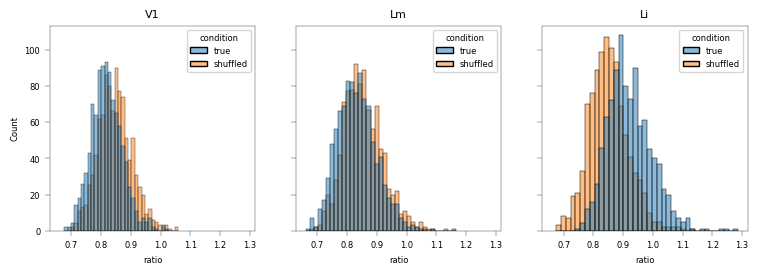

In [131]:
fig, axn = pl.subplots(1, 3, sharex=True, sharey=True, figsize=(9,3))
for va, vd in DIFFS.groupby('visual_area'):
    ax=axn[visual_areas.index(va)]
    sns.histplot(data=vd, x=metric_name, hue='condition', ax=ax)
    ax.set_title(va)
    ax.set_box_aspect(1)

<IPython.core.display.Javascript object>


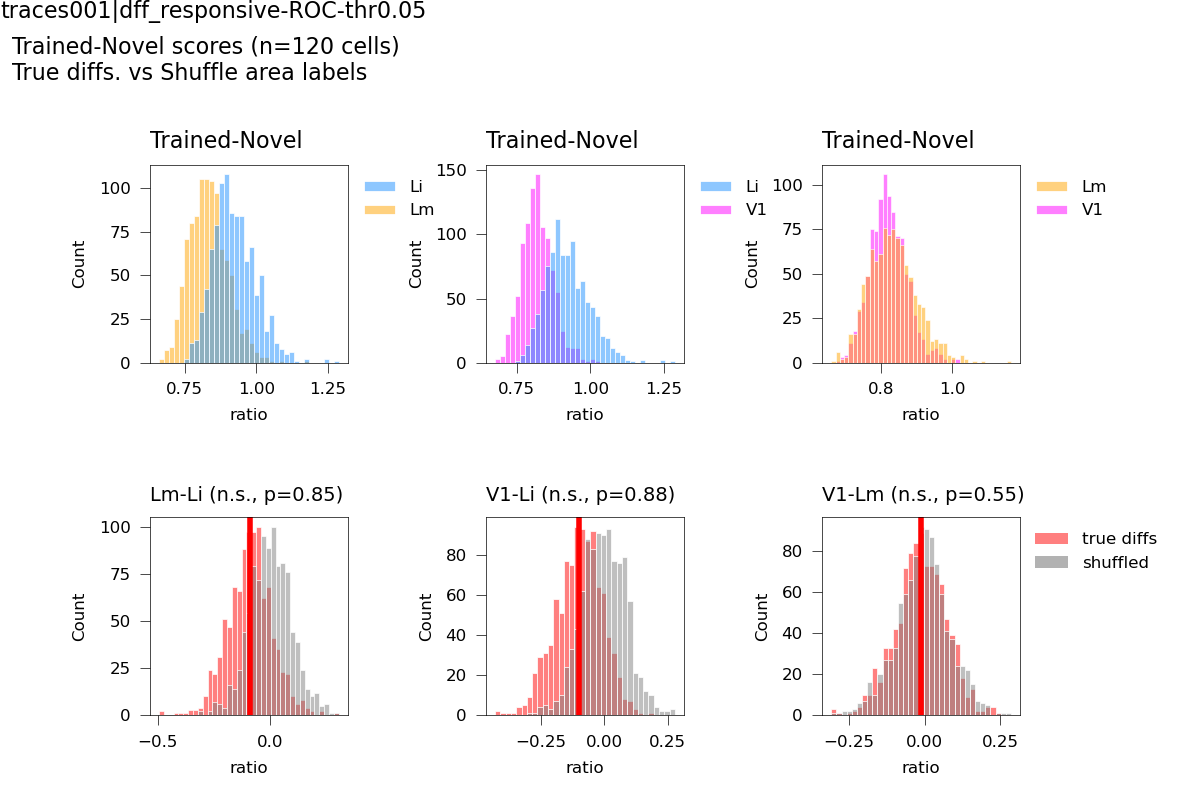

In [132]:
%matplotlib notebook
# v1='Li'
# v2 = 'Lm'
shuff_colors = {'true': 'r', 'shuffled': [0.5]*3}                      
s_list=[]
fig, axn = pl.subplots(2, 3, figsize=(6,4), dpi=100)
for vi, (vpair, diffs_) in enumerate(diff_v_shuff.groupby('area_pair')):
    v1, v2 = vpair.split('_')
    # Diff distribution for each area (TRAINED-NOVEL)
    ax=axn[0, vi] 
    curr_scores = DIFFS[(DIFFS.condition=='true') 
                        & (DIFFS.visual_area.isin([v1, v2]))].copy()
    sns.histplot(x=metric_name, data=curr_scores, ax=ax,
                 palette=area_colors, hue='visual_area', edgecolor='w')
    pplot.sns_histplot_legend(ax, title='')
    ax.set_title('Trained-Novel', loc='left')
    
    # shuffled
    ax=axn[1, vi]
    sns.histplot(x=metric_name, data=diffs_, ax=ax, alpha=0.5, edgecolor='w',
                hue='condition', palette=shuff_colors)
    meandiffs = diffs_.groupby('condition').mean()
    true_diff = float(meandiffs.loc['true'][metric_name])
    shuff_diff = float(meandiffs.loc['shuffled'][metric_name])
    if vi!=2:
        ax.legend_.remove()
    shuff_dist = np.array(sorted(diffs_[diffs_.condition=='shuffled'][metric_name].values))
    n_extreme = len(np.where(shuff_dist>=true_diff)[0])
    pv = n_extreme/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    if vi==2:
        legh = pplot.custom_legend_markers(colors=['r', [0.4]*3], 
                                    labels=['true diffs', 'shuffled'], 
                                    use_patch=True, alpha=0.5)
        ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
    ax.axvline(x=true_diff, ls='-', c='r', lw=2)
    ax.set_title('%s-%s (%s, p=%.2f)' % (v1, v2, sig_str, pv),
                 loc='left', fontsize=7)
    stats0 = pd.Series({'v1': v1, 'v2': v2, 'true_diff': true_diff,
                       'shuff_diff': shuff_diff, 'p-val': pv})
    s_list.append(stats0)
for ax in axn.flat:
    ax.set_box_aspect(1)
pl.subplots_adjust(wspace=0.7, hspace=0.7, bottom=0.1, top=0.8, right=0.85)

pplot.label_figure(fig,data_id)
fig.text(0.01, 0.9, 
    'Trained-Novel scores (n=%i cells)\nTrue diffs. vs Shuffle area labels' \
         % curr_ncells, fontsize=8)

figname = 'trained_vs_novel_shuffle_area_labels_n%icells' % curr_ncells

# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [133]:
pd.concat(s_list, axis=1).T

,v1,v2,true_diff,shuff_diff,p-val
0,Lm,Li,-0.089202,0.001887,0.851
1,V1,Li,-0.101411,-0.004092,0.877
2,V1,Lm,-0.012209,-0.005979,0.547


In [331]:
statsdf = pd.concat(s_list, axis=1).T
statsdf['p-val'] = statsdf['p-val'].astype(float)
statsdf['reject_null_uncorr'] = statsdf['p-val']<0.05

post_hoc='fdr_bh'
reject, pvals_corr = pg.multicomp(statsdf['p-val'].values, method=post_hoc)
statsdf['reject_null'] = reject
statsdf['p_adjusted'] = pvals_corr
statsdf.round(2)

,v1,v2,true_diff,shuff_diff,p-val,reject_null_uncorr,reject_null,p_adjusted
0,Lm,Li,-0.093824,0.001705,0.86,False,False,0.86
1,V1,Li,-0.095058,-0.006209,0.86,False,False,0.86
2,V1,Lm,-0.001234,-0.007914,0.45,False,False,0.86


In [332]:
import scikit_posthocs as sp

In [333]:
# import sys
# !pip install --prefix {sys.prefix} scikit-posthocs

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/envs/rat2pMIGR/lib/python3.8/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


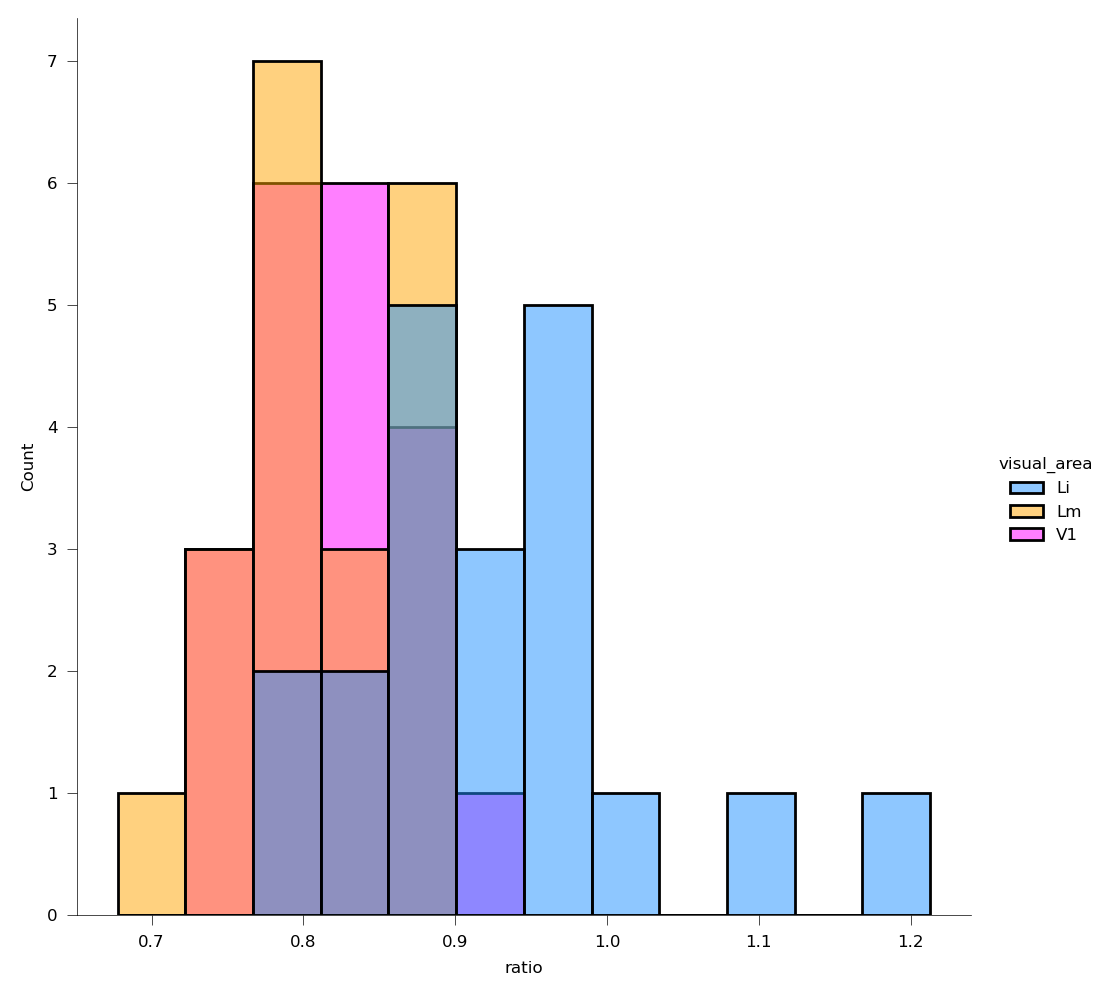

In [342]:
# d = diff_v_shuff[diff_v_shuff['area_pair']=='V1_Li'].groupby('condition').sample(10)
#d = diff_v_shuff[diff_v_shuff['area_pair']=='V1_Li']
d = diff_scores.groupby('visual_area').sample(20, replace=False)
#fig, ax = pl.subplots()
sns.displot(data=d, x=metric_name, hue='visual_area', ax=ax, 
            palette=area_colors)

In [343]:
# Kruskal-wallist:  nonparametric, one-way ANOVA on ranks
# Mann-Whitney U (Wilcoxon rank-sum test):  nonparametric, indep T_test
# Wilcoxon signed-rank test:  non-parametric version of paired T-test
# pg.kruskal(data=diff_scores, dv='difference', between='visual_area')

pg.kruskal(data=d, dv=metric_name, between='visual_area')

,Source,ddof1,H,p-unc
Kruskal,visual_area,2,24.964262,0.000004


In [344]:
# Perform Dunn's post-hoc test with Bonferroni correction
posthoc_results = sp.posthoc_dunn(d, val_col=metric_name, 
                                  group_col='visual_area', p_adjust='bonferroni')
print(posthoc_results)

          Li       Lm        V1
Li  1.000000  0.00001  0.000286
Lm  0.000010  1.00000  1.000000
V1  0.000286  1.00000  1.000000


In [337]:
%matplotlib notebook

<IPython.core.display.Javascript object>


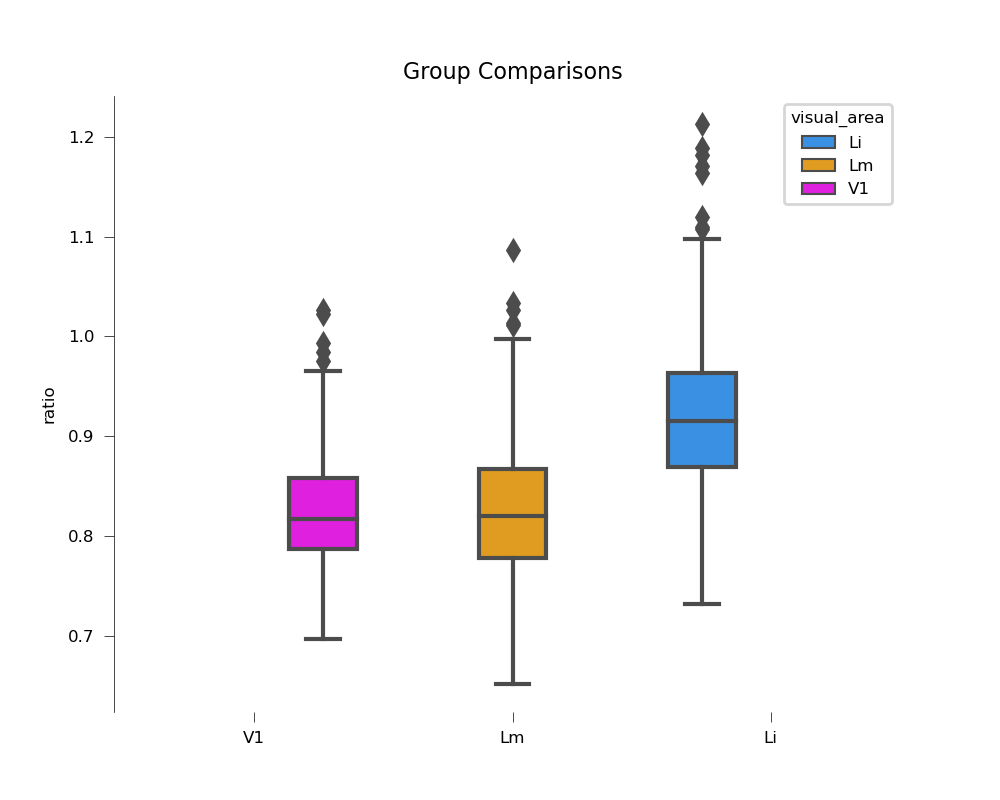

In [339]:
# Example boxplot
fig, ax = pl.subplots()
sns.boxplot(x='visual_area', y=metric_name, ax=ax, data=d,
            hue='visual_area', palette=area_colors,
            order=visual_areas)
pl.title('Group Comparisons')
sns.despine(trim=False,bottom=True, offset=4)
ax.set_xlabel('')
pl.show()

In [117]:
reject

array([False, False, False])

In [118]:
v1='V1'
v2 = 'Li'

curr_scores = diff_scores[diff_scores.visual_area.isin([v1, v2])].copy()

#v1_vals = diff_scores[diff_scores.visual_area==v1]['difference'].values
#v2_vals = diff_scores[diff_scores.visual_area==v2]['difference'].values

true_scores = data_scores[data_scores.visual_area.isin([v1, v2])].copy()
true_diffs = dec.calculate_difference_scores(true_scores)
print(true_scores.shape, true_diffs.shape)

(2000, 18) (1000, 4)


In [119]:
shuff_df = iterdf[(iterdf.n_cells==curr_ncells) & (iterdf.condition=='data')].copy()
shuff_df.head()

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
45000,0.137028,0.000721,0.8,1.0,0.875000,1.0,8875,data,10.0,10.0,38,False,375,141,6958,Li,aggregate,True,intact,0.0
45002,0.137028,0.000721,0.8,1.0,0.868421,1.0,8875,data,10.0,20.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45003,0.137028,0.000721,0.8,1.0,0.710526,1.0,8875,data,10.0,30.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45004,0.137028,0.000721,0.8,1.0,0.631579,1.0,8875,data,10.0,40.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45005,0.137028,0.000721,0.8,1.0,0.605263,1.0,8875,data,10.0,50.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0


In [120]:
for (t1, t2), g in shuff_df[shuff_df.iteration==0]\
            .groupby(['train_transform', 'test_transform']):
    g

In [121]:
g

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
48774,0.000731,0.000294,0.866667,1.0,0.875000,1.0,2267,data,50.0,50.0,38,False,0,141,2609,Li,aggregate,True,intact,0.0
585024,0.000826,0.000352,0.935556,1.0,1.000000,1.0,3889,data,50.0,50.0,58,False,0,141,9573,Lm,aggregate,True,intact,0.0
795024,0.000829,0.000348,0.935556,1.0,0.833333,1.0,8859,data,50.0,50.0,58,False,0,141,967,V1,aggregate,True,intact,0.0


In [122]:
shuffle_groups = ['train_transform', 'test_transform','iteration']

shuff_df['visual_area'] = shuff_df.groupby(shuffle_groups)['visual_area']\
                                          .transform(np.random.permutation)
shuff_df.head()

,fit_time,score_time,test_score,train_score,heldout_test_score,C,randi,condition,train_transform,test_transform,n_trials,novel,iteration,n_cells,randi_cells,visual_area,datakey,intact,noise_corrs,overlap_thr
45000,0.137028,0.000721,0.8,1.0,0.875000,1.0,8875,data,10.0,10.0,38,False,375,141,6958,Li,aggregate,True,intact,0.0
45002,0.137028,0.000721,0.8,1.0,0.868421,1.0,8875,data,10.0,20.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45003,0.137028,0.000721,0.8,1.0,0.710526,1.0,8875,data,10.0,30.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45004,0.137028,0.000721,0.8,1.0,0.631579,1.0,8875,data,10.0,40.0,38,True,375,141,6958,Li,aggregate,True,intact,0.0
45005,0.137028,0.000721,0.8,1.0,0.605263,1.0,8875,data,10.0,50.0,38,True,375,141,6958,Lm,aggregate,True,intact,0.0


In [123]:
shuff_scores = dec.average_within_iterations_by_ncells(shuff_df, 
                                analysis_type='by_ncells',
                                test_type='size_single',
                                grouper=['visual_area', 'condition', 'iteration'])
#shuff_scores = shuff_scores0[shuff_scores0.visual_area.isin([v1, v2])].copy()
shuff_diff_scores = dec.calculate_difference_scores(shuff_scores)

/n/holylfs05/LABS/pfister_lab/Lab/coxfs01/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/decoding.py:2583: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_iters = iterdf.groupby(grouper).mean().reset_index()


<IPython.core.display.Javascript object>


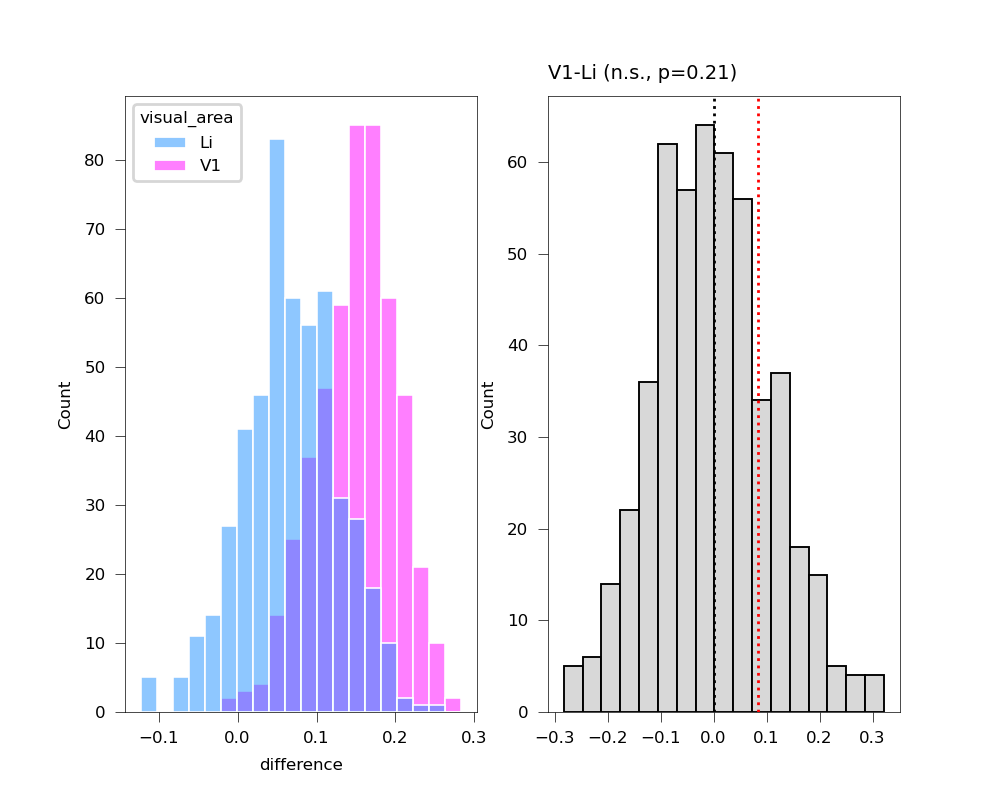

Text(0.0, 1.0, 'V1-Li (n.s., p=0.21)')

In [124]:
fig, axn = pl.subplots(1, 2)
ax=axn[0]
sns.histplot(x='difference', data=curr_scores, ax=ax,
                 palette=area_colors, hue='visual_area', edgecolor='w')

v1_vals = diff_scores[diff_scores.visual_area==v1]['difference'].values
v2_vals = diff_scores[diff_scores.visual_area==v2]['difference'].values
curr_diffs = v1_vals - v2_vals

v1_vals = shuff_diff_scores[shuff_diff_scores.visual_area==v1]['difference'].values
v2_vals = shuff_diff_scores[shuff_diff_scores.visual_area==v2]['difference'].values
curr_diffs_shuff = v1_vals - v2_vals
true_diff = np.mean(curr_diffs)

ax=axn[1]
sns.histplot(curr_diffs_shuff, ax=ax, color=[0.8]*3)
#sns.histplot(curr_diffs, ax=ax, color='r')

shuff_dist = np.array(sorted(curr_diffs_shuff))
n_extreme = len(np.where(shuff_dist>=true_diff)[0])
pv = n_extreme/len(shuff_dist)
if pv<0.05:
    sig_str='**' if pv<0.01 else '*'
else:
    sig_str='n.s.'
ax.axvline(x=0, ls=':', c='k', lw=1)
ax.axvline(x=true_diff, ls=':', c='r', lw=1)

ax.set_title('%s-%s (%s, p=%.2f)' % (v1, v2, sig_str, pv),
             loc='left', fontsize=7)


In [ ]:
import

In [136]:
shuff_diffs

,visual_area,n_cells,iteration,difference
0,Li,120,0,0.111872
2000,V1,120,0,0.189368
2,Li,120,1,0.021779
2002,V1,120,1,0.045221
4,Li,120,2,0.148382
...,...,...,...,...
3994,V1,120,997,0.098654
1996,Li,120,998,0.043073
3996,V1,120,998,0.157426
1998,Li,120,999,0.058500


In [117]:
# shuff_scores = data_scores[data_scores.visual_area.isin([v1, v2])].copy()
# # vals =shuff_scores['visual_area'].sample(frac=1).values
# shuff_scores['visual_area'] = shuff_scores.groupby(['novel', 'iteration'])['visual_area']\
#                                           .transform(np.random.permutation)
# shuff_scores[shuff_scores.visual_area==v1]
# # shuff_scores['visual_area'] = vals
# # shuff_diffs = dec.calculate_difference_scores(shuff_scores)
# d1 = shuff_scores[shuff_scores.visual_area==v1][['heldout_test_score', 'novel']]
# d2 = shuff_scores[shuff_scores.visual_area==v2][['heldout_test_score', 'novel']]
# d1

In [118]:
# diffs1 = d1[d1.novel].sort_index()['heldout_test_score'].values \
#             - d1[~d1.novel].sort_index()['heldout_test_score']
# diffs2 = d2[d2.novel].sort_index()['heldout_test_score'].values \
#             - d2[~d2.novel].sort_index()['heldout_test_score']

# diffs_ = diffs1 - diffs2

<IPython.core.display.Javascript object>


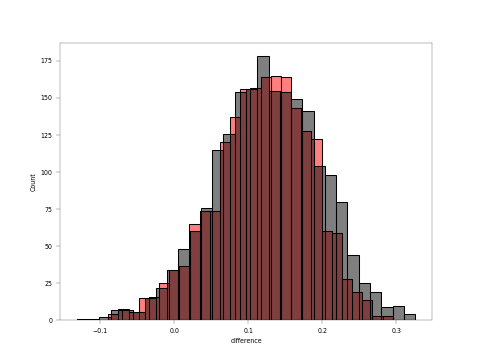

<AxesSubplot:xlabel='difference', ylabel='Count'>

In [119]:
fig, ax =pl.subplots()
sns.histplot(x='difference', data=true_diffs, color='r', alpha=0.5, ax=ax)
# sns.histplot(diffs_, color=[0.8]*3, alpha=0.5, ax=ax)

sns.histplot(x='difference', data=shuff_diffs, color='k', alpha=0.5, ax=ax)


In [20]:
import itertools

<IPython.core.display.Javascript object>


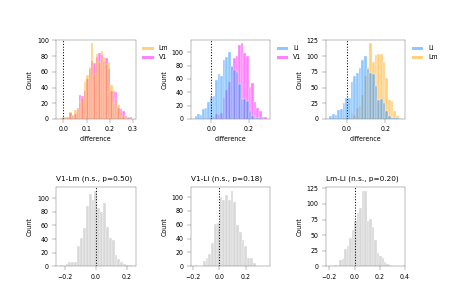

In [21]:
v1='Li'
v2 = 'Lm'
v_combos = list(itertools.combinations(visual_areas, 2))

fig, axn = pl.subplots(2, 3, figsize=(6,4), dpi=100)
for vi, (v1, v2) in enumerate(v_combos):

    curr_scores = diff_scores[diff_scores.visual_area.isin([v1, v2])].copy()
    ax=axn[0, vi]
    sns.histplot(x='difference', data=curr_scores, ax=ax,
                 palette=area_colors, hue='visual_area', edgecolor='w')
    ax.axvline(x=0, ls=':', c='k', lw=1)
    pplot.sns_histplot_legend(ax, title='')
    v1_vals = diff_scores[diff_scores.visual_area==v1]['difference'].values
    v2_vals = diff_scores[diff_scores.visual_area==v2]['difference'].values
    curr_diffs = v1_vals - v2_vals

    ax=axn[1, vi]
    sns.histplot(curr_diffs, ax=ax, color=[0.8]*3, edgecolor='w')
    shuff_dist = np.array(sorted(curr_diffs))
    n_extreme = len(np.where(shuff_dist<=0)[0])
    pv = n_extreme/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    ax.axvline(x=0, ls=':', c='k', lw=1)
    ax.set_title('%s-%s (%s, p=%.2f)' % (v1, v2, sig_str, pv),
                 loc='left', fontsize=7)
for ax in axn.flat:
    ax.set_box_aspect(1)
pl.subplots_adjust(wspace=0.7, hspace=0.7, bottom=0.1, right=0.9)

In [62]:
len(shuff_dist)

1000

In [30]:
import itertools

<IPython.core.display.Javascript object>


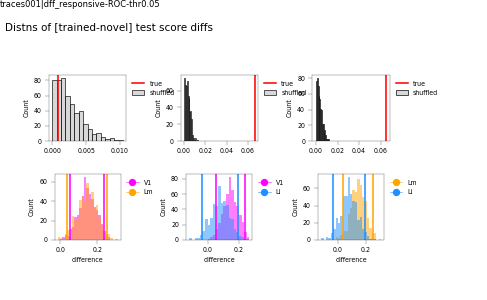

In [31]:
n_shuff=500
p_vals = []
metric='difference'
v_combos = list(itertools.combinations(visual_areas, 2))

fig, axn = pl.subplots(2, len(v_combos), figsize=(6.5,4))
for ai, (v1, v2) in enumerate(v_combos):
    v_list = [v1, v2]
    a_ = diff_scores[diff_scores.visual_area==v1][metric]
    b_ = diff_scores[diff_scores.visual_area==v2][metric]
    true_ = abs(a_.mean() - b_.mean())

    combined_ = pd.concat([a_, b_], axis=0, ignore_index=True).values
    shuff_=[]
    for n in range(n_shuff):
        np.random.shuffle(combined_)
        i = np.mean(combined_[0:500])
        v = np.mean(combined_[500:])
        diff_s = abs(i-v)
        shuff_.append(diff_s)
    shuff = np.array(shuff_)
    pv_ = len(np.where(shuff>=true_)[0])/n_shuff
    p_vals.append(pd.Series({'v1': v1, 'v2': v2, 'p_val': pv_}))
    
    ax=axn[0, ai]
    sns.histplot(shuff, color=[0.8]*3, ax=ax, label='shuffled')
    ax.axvline(x=true_, color='r', label='true')
    ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

    ax=axn[1, ai]
    c1= area_colors[v1]
    c2 = c2=area_colors[v2]
    sns.histplot(x=metric, hue='visual_area', ax=ax,
                 data=diff_scores[diff_scores.visual_area.isin(v_list)], 
                 palette={v1:c1, v2: c2}, fill=True, edgecolor=None)
    c_lo, c_hi = hutils.get_empirical_ci(diff_scores[diff_scores.visual_area==v1][metric].values)
    ax.axvline(x=c_lo, color=c1)
    ax.axvline(x=c_hi, color=c1)

    c_lo, c_hi = hutils.get_empirical_ci(diff_scores[diff_scores.visual_area==v2][metric].values)
    ax.axvline(x=c_lo, color=c2)
    ax.axvline(x=c_hi, color=c2)
    leg_h = pplot.custom_legend_markers(colors=[c1, c2], labels=[v1, v2])
    ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.75, wspace=0.7, hspace=0.5)
fig.text(0.01, 0.9, "Distns of [trained-novel] test score diffs")

pplot.label_figure(fig, data_id)


In [49]:

diffs = dec.permutation_test_trained_v_novel(data_df)
diffs.head()

,visual_area,n_cells,iteration,difference,trained_v_novel
0,Li,128,0,0.111842,true
1,Lm,128,0,0.044828,true
2,V1,128,0,0.165230,true
3,Li,128,1,0.144737,true
4,Lm,128,1,0.177586,true


<IPython.core.display.Javascript object>


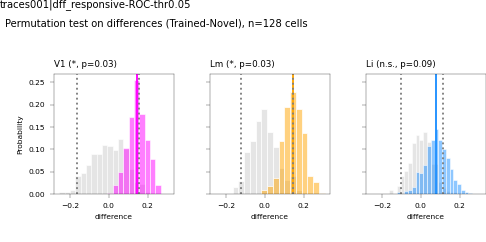

In [51]:
shuff_color=[0.8]*3

fig, axn = pl.subplots(1,3, figsize=(6,3), sharex=True, sharey=True)

for va, vg in diffs.groupby(['visual_area']):
    vi = visual_areas.index(va)
    ax=axn[vi]
    curr_colors= area_colors.copy()
    sns.histplot(x='difference', hue='trained_v_novel', data=vg, ax=ax, alpha=0.5,
                palette={'shuffled': shuff_color, 'true': curr_colors[va]},
                stat='probability', legend=True, common_norm=False,
                edgecolor='w')
    
    meas_mean = vg[vg.trained_v_novel=='true']['difference'].mean()
    ax.axvline(x=meas_mean, color=curr_colors[va])
    shuff_dist = sorted(vg[vg.trained_v_novel=='shuffled']['difference'].values)
    n_extreme = len(np.where(shuff_dist>=meas_mean)[0])
    pv = n_extreme/len(shuff_dist)
    if pv<0.05:
        sig_str='**' if pv<0.01 else '*'
    else:
        sig_str='n.s.'
    ax.set_title('%s (%s, p=%.2f)' % (va, sig_str, pv), loc='left', fontsize=7)
    
    c_lo, c_hi = hutils.get_empirical_ci(shuff_dist)
    ax.axvline(x=c_lo, color=[0.5]*3, ls=':')
    ax.axvline(x=c_hi, color=[0.5]*3, ls=':')
    if va=='Li':
        leg_h = pplot.custom_legend_markers(colors=[[0.5]*3, shuff_color],
                                           labels=['true', 'shuffled'], 
                                           use_patch=True)
        ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False,
                 title=None)
    else:
        ax.legend_.remove()
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.8, wspace=0.3, hspace=0.5)
fig.text(0.01, 0.9,\
         "Permutation test on differences (Trained-Novel), n=%i cells" \
         % max_ncells, fontsize=8)

pplot.label_figure(fig, data_id)

In [34]:
# Shuffle
currd = byiter_data[byiter_data['n_cells']==max_ncells].copy()
d_list = []
for i in range(n_iters):
    d_=[]
    for va, all_vals in currd.groupby(['visual_area']):
        half_vs = all_vals['heldout_test_score'].sample(n=n_iters, replace=False)
        unused = [v for v in all_vals.index if v not in half_vs.index]
        other_vs = all_vals.loc[unused, 'heldout_test_score'].sample(n_iters)
        diff_ = np.mean(half_vs.values - other_vs.values)
        df_ = pd.DataFrame({diff_}, index=[i], columns=[va])
        d_.append(df_)
    d_list.append(pd.concat(d_, axis=1))
shuff_diff = pd.concat(d_list, axis=0).stack().reset_index()\
                .rename(columns={0: 'difference', 'level_1': 'visual_area'})
shuff_diff['condition'] = 'shuffled'
shuff_diff = shuff_diff.drop('level_0', 1)

In [35]:
# combine
true_diff = pd.concat([pd.DataFrame({'difference': d['difference'].values}, 
                                     index=[va]*n_iters) \
    for va, d in diffdf[diffdf['n_cells']==max_ncells].groupby('visual_area')], 
                       axis=0) #.reset_index(drop=True)
true_diff['condition'] = 'data'
true_diff['visual_area'] = true_diff.index.tolist()
true_diff = true_diff.reset_index(drop=True)
diffs = pd.concat([true_diff, shuff_diff], axis=0)

<IPython.core.display.Javascript object>


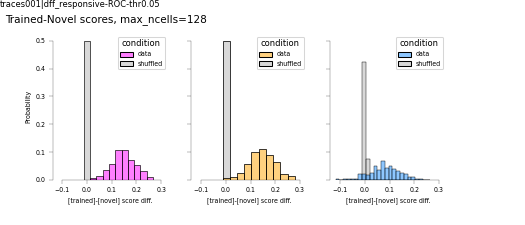

In [36]:
fig, axn = pl.subplots(1,3, figsize=(7, 3), sharex=True, sharey=True)
for vi, (va, df_) in enumerate(diffs.groupby('visual_area')):
    ax=axn[visual_areas.index(va)]
    sns.histplot(x='difference', hue='condition', data=df_, ax=ax, alpha=0.5,
                palette={'data': area_colors[va], 'shuffled': [0.7]*3},
                 stat='probability', legend=True)
#                 cumulative=True, element='poly', fill=False)
    #true_mean = diffdf[diffdf.visual_area==va]['difference'].mean()
    #ax.axvline(x=true_mean, color=area_colors[va])
pl.subplots_adjust(left=0.1, right=0.85, bottom=0.2, top=0.85)
for ax in axn:
    ax.set_xlabel('[trained]-[novel] score diff.')
    #ax.legend(bbox_to_anchor=(1,1), loc='upper right', frameon=False, fontsize=6,)
    #          title='')
sns.despine(trim=True)

fig.text(0.01, 0.9, 'Trained-Novel scores, max_ncells=%i' % max_ncells)

pplot.label_figure(fig, data_id)

figname = 'hist_trained_vs_novel__%s' % aggr_id
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [37]:
import scipy.stats as spstats

In [38]:
data = [diffdf.loc[ids, 'difference'].values \
        for ids in diffdf.groupby('visual_area').groups.values()]

In [39]:
H, p = spstats.kruskal(*data)
H, p

(1022.2714023609312, 1.038928053918243e-222)

In [40]:
# import scikit_posthocs as skp
# skp.post_(df, val_col='SepalWidth', group_col='Species', p_adjust = 'holm')

<IPython.core.display.Javascript object>


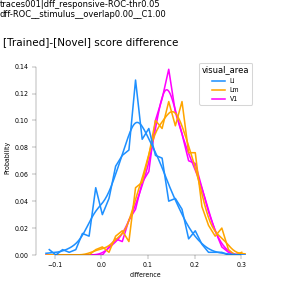

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00 dist_trained_vs_novel_difference__dff-ROC__stimulus__overlap0.00__C1.00


In [41]:
fig, ax = pl.subplots(figsize=(4,4))
sns.histplot(x='difference', hue='visual_area', data=diffs[diffs.condition=='data'],
             ax=ax,
            cumulative=False, element='poly', fill=False, kde=True,
            palette=area_colors, stat='probability', common_norm=False)
# sns.histplot(x='difference', hue='visual_area', data=diffs[diffs.condition=='shuffled'],
#              ax=ax, line_kws={'linestyle': ':'},
#             cumulative=True, element='poly', fill=False,
#             palette=area_colors, stat='probability', common_norm=False)

pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
sns.despine(trim=True)
fig.text(0.01, 0.85, '[Trained]-[Novel] score difference')
pl.subplots_adjust(bottom=0.15, top=0.8, left=0.12, right=0.85)
#figname='cumdist_trained_vs_novel_difference__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
figname='dist_trained_vs_novel_difference__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
pl.savefig(os.path.join(curr_dst_dir,  '%s.svg' % figname))
print(curr_dst_dir, figname)

In [42]:
diffs.groupby(['visual_area', 'condition']).count()

difference
visual_area condition            
Li          data              500
            shuffled          500
Lm          data              500
            shuffled          500
V1          data              500
            shuffled          500

In [240]:
pg.kruskal(data=plotd, dv='difference', between='visual_area')

,Source,ddof1,H,p-unc
Kruskal,visual_area,2,364.44635,7.269099e-80


<IPython.core.display.Javascript object>


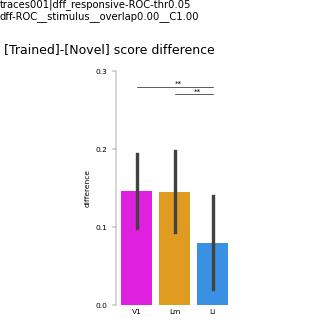

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00 bar_trained_vs_novel_difference__dff-ROC__stimulus__overlap0.00__C1.00


In [243]:
plotd = diffs[diffs.condition=='data'].copy()
posthoc='fdr_bh'
ylim=0.3
fig, ax = pl.subplots(figsize=(4,4))
sns.barplot(x='visual_area', y='difference', data=plotd,
             ax=ax, palette=area_colors, order=visual_areas, ci='sd')

sts = pg.pairwise_ttests(data=plotd, dv='difference', between='visual_area',
                         parametric=False, padjust=posthoc, effsize='eta-square')  
pplot.annotate_multicomp_by_area(ax, sts, y_loc=0.27, offset=0.01)

ax.set_box_aspect(2)
ax.set_ylim([0, ylim])
ax.set_yticks(np.linspace(0, ylim, 4))
sns.despine(bottom=True, trim=True)
ax.tick_params(which='both', axis='x', size=0)
ax.set_xlabel('')
pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
fig.text(0.01, 0.85, '[Trained]-[Novel] score difference')
pl.subplots_adjust(bottom=0.15, top=0.8, left=0.12, right=0.85)

figname='bar_trained_vs_novel_difference__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
pl.savefig(os.path.join(curr_dst_dir,  '%s.svg' % figname))
print(curr_dst_dir, figname)


In [148]:
all_vals =  diffs[diffs.condition=='data']
# li_vals = all_vals[all_vals.visual_area=='Li']['difference']
# lm_vals = all_vals[all_vals.visual_area=='Lm']['difference']
# v1_vals = all_vals[all_vals.visual_area=='V1']['difference']


In [194]:
import itertools
import pingouin as pg


<IPython.core.display.Javascript object>


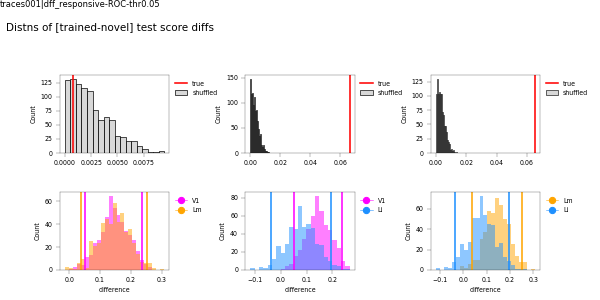

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00 shuffle_test_trained-v-novel


In [234]:
n_shuff=1000
p_vals = []
metric='difference'
# v1='Lm'
# v2='Li'
v_combos = list(itertools.combinations(visual_areas, 2))

fig, axn = pl.subplots(2, len(v_combos), figsize=(8,4))

for ai, (v1, v2) in enumerate(v_combos):
    v_list = [v1, v2]
    a_ = all_vals[all_vals.visual_area==v1][metric]
    b_ = all_vals[all_vals.visual_area==v2][metric]
    true_ = abs(a_.mean() - b_.mean())

    combined_ = pd.concat([a_, b_], axis=0, ignore_index=True).values
    shuff_=[]
    for n in range(n_shuff):
        np.random.shuffle(combined_)
        i = np.mean(combined_[0:500])
        v = np.mean(combined_[500:])
        diff_s = abs(i-v)
        shuff_.append(diff_s)
    shuff = np.array(shuff_)
    pv_ = len(np.where(shuff>true_)[0])/n_shuff
    p_vals.append(pd.Series({'v1': v1, 'v2': v2, 'p_val': pv_}))
    
    ax=axn[0, ai]
    sns.histplot(shuff, color=[0.8]*3, ax=ax, label='shuffled')
    ax.axvline(x=true_, color='r', label='true')
    ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

    ax=axn[1, ai]
    c1= area_colors[v1]
    c2 = c2=area_colors[v2]
    sns.histplot(x=metric, hue='visual_area', ax=ax,
                 data=all_vals[all_vals.visual_area.isin(v_list)], 
                 palette={v1:c1, v2: c2}, fill=True, edgecolor=None)
    c_lo, c_hi = hutils.get_empirical_ci(all_vals[all_vals.visual_area==v1][metric].values)
    ax.axvline(x=c_lo, color=c1)
    ax.axvline(x=c_hi, color=c1)

    c_lo, c_hi = hutils.get_empirical_ci(all_vals[all_vals.visual_area==v2][metric].values)
    ax.axvline(x=c_lo, color=c2)
    ax.axvline(x=c_hi, color=c2)
    leg_h = pplot.custom_legend_markers(colors=[c1, c2], labels=[v1, v2])
    ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
    
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.75, wspace=0.7, hspace=0.5)
fig.text(0.01, 0.9, "Distns of [trained-novel] test score diffs")

pplot.label_figure(fig, data_id)

figname = 'shuffle_test_trained-v-novel'
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
print(curr_dst_dir, figname)


In [200]:
pd.concat(p_vals, axis=1).T


,v1,v2,p_val
0,V1,Lm,0.823
1,V1,Li,0.0
2,Lm,Li,0.0


In [195]:
pg.multicomp(p_vals, alpha=0.05, method='bonf')

(array([False,  True,  True]), array([1., 0., 0.]))

In [205]:
curr_dst_dir

'/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/dff-ROC__stimulus__overlap0.00__C1.00'

## Check if NOVEL v TRAINED diff

In [124]:
# df_ = mean_df[(mean_df['n_cells']==max_ncells) 
#             & (mean_df['condition']=='data')].copy()
# df_.groupby(['visual_area', 'novel']).count()

# df_ = mean_df[(mean_df['n_cells']==max_ncells) 
#             & ~(mean_df['novel'])].copy().reset_index(drop=True)
# df_.groupby(['visual_area', 'condition']).count()

df_ = mean_df[(mean_df['n_cells']==96) 
            & (mean_df['condition']=='data')].copy().reset_index(drop=True)
df_.groupby(['visual_area', 'novel']).count()

condition  iteration  n_cells  fit_time  score_time  \
visual_area novel                                                        
Li          False        500        500      500       500         500   
            True         500        500      500       500         500   
Lm          False        500        500      500       500         500   
            True         500        500      500       500         500   
V1          False        500        500      500       500         500   
            True         500        500      500       500         500   

                   test_score  train_score  heldout_test_score    C  randi  \
visual_area novel                                                            
Li          False         500          500                 500  500    500   
            True          500          500                 500  500    500   
Lm          False         500          500                 500  500    500   
            True          500          500                 500  500    500   
V1          False         500          500                 500  500    500   
            True          500          500                 500  500    500   

                   train_transform  test_transform  n_trials  randi_cells  \
visual_area novel                                                           
Li          False              500             500       500          500   
            True               500             500       500          500   
Lm          False              500             500       500          500   
            True               500             500       500          500   
V1          False              500             500       500          500   
            True               500             500       500          500   

                   intact  overlap_thr  
visual_area novel                       
Li          False     500          500  
            True      500          500  
Lm          False     500          500  
            True      500          500  
V1          False     500          500  
            True      500          500

<IPython.core.display.Javascript object>


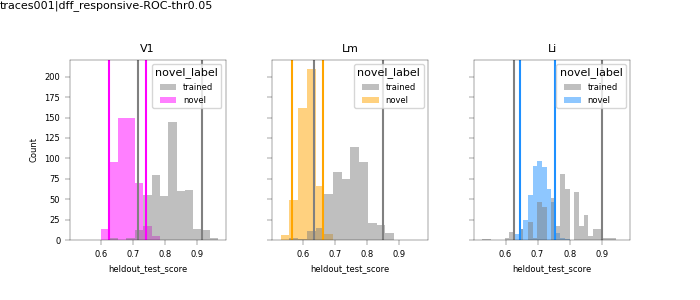

In [125]:
metric='heldout_test_score'
# c1='cornflowerblue'
# c2 = [0.8]*3
v1='novel'
v2='trained'
df_['novel_label'] = [v1 if v else v2 for v in df_['novel'].values]
fig, axn = pl.subplots(1,3, figsize=(7,3), sharex=True, sharey=True)

for va, vg in df_.groupby('visual_area'):
    ax=axn[visual_areas.index(va)]
    c1 = area_colors[va]
    c2 = [0.5]*3
#     a_ = vg[(vg.novel)][metric]
#     b_ = vg[~(vg.novel)][metric]
#     true_ = b_.mean() - a_.mean()
#     combined_ = pd.concat([a_, b_], axis=0, ignore_index=True).values
#     shuff_=[]
#     for n in range(1000):
#         np.random.shuffle(combined_)
#         i = np.mean(combined_[0:500])
#         v = np.mean(combined_[500:])
#         ds_ = abs(i-v)
#         shuff_.append(ds_)
#     shuff = np.array(shuff_)
#     sns.histplot(shuff, color=[0.8]*3, ax=ax, label='shuffled')
#     ax.axvline(x=true_, color='r', label='true')
#     print(len(np.where(shuff>true_)[0])/2000.)
#     pl.subplots_adjust(bottom=0.2, right=0.8)

    sns.histplot(x='heldout_test_score', hue='novel_label', data=vg, ax=ax,
                palette={v1: c1, v2: c2}, fill=True, edgecolor=None)
#     ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)

    c_lo, c_hi = hutils.get_empirical_ci(vg[vg.novel][metric].values)
    ax.axvline(x=c_lo, color=c1)
    ax.axvline(x=c_hi, color=c1)

    c_lo, c_hi = hutils.get_empirical_ci(vg[~(vg.novel)][metric].values)
    ax.axvline(x=c_lo, color=c2)
    ax.axvline(x=c_hi, color=c2)
    ax.set_title(va)
    
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.8, wspace=0.3)
pplot.label_figure(fig, data_id)

# figname = 'distns_95CI_test_trained-v-novel'
# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))
# print(curr_dst_dir, figname)


In [131]:
len(np.where(shuff<true_)[0])/1000.


1.667

In [357]:
import pingouin as pg

In [375]:
plotd = df_[['visual_area', 'novel', 'heldout_test_score', 'iteration']].copy().reset_index(drop=True)
plotd['subject'] = ['%s_%i' % (va, ni) for va, ni in plotd[['visual_area', 'iteration']].values]
plotd.head()

,visual_area,novel,heldout_test_score,iteration,subject
0,Li,False,0.825000,0,Li_0
1,Li,True,0.713158,0,Li_0
2,Li,False,0.900000,1,Li_1
3,Li,True,0.755263,1,Li_1
4,Li,False,0.650000,2,Li_2


In [372]:
from pingouin import mixed_anova, read_dataset
df = read_dataset('mixed_anova')
df

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [378]:
pg.mixed_anova(data=plotd, dv='heldout_test_score', within='novel', 
              between='visual_area', subject='subject', correction=True)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,visual_area,2.954740,2,1497,1.477370,822.690953,9.019487e-242,0.52361,NaN
1,novel,11.500601,1,1497,11.500601,8041.647076,0.000000e+00,0.84306,1.0
2,Interaction,0.721420,2,1497,0.360710,252.221841,3.962799e-95,0.25204,NaN


<IPython.core.display.Javascript object>


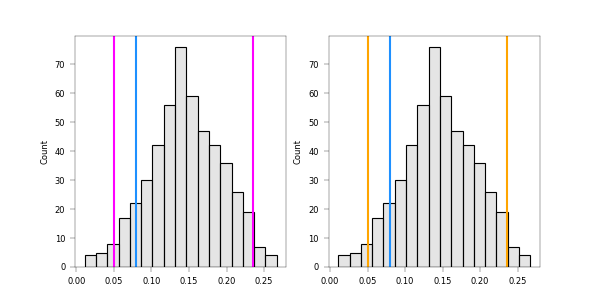

In [229]:
all_vals =  diffs[diffs.condition=='data']
li_vals = all_vals[all_vals.visual_area=='Li']['difference'].values
lm_vals = all_vals[all_vals.visual_area=='Lm']['difference'].values
v1_vals = all_vals[all_vals.visual_area=='V1']['difference'].values

fig, axn = pl.subplots(1,2, figsize=(6,3))
ax=axn[0]
compare_v = 'V1'
for ax, compare_v in zip(axn.flat, ['V1', 'Lm']):
    compare_vals = all_vals[all_vals.visual_area==compare_v]['difference'].values
    sns.histplot(v1_vals, color=[0.8]*3, alpha=0.5, ax=ax)
    c_lo, c_hi = hutils.get_empirical_ci(v1_vals, ci=0.95)
    ax.axvline(x=c_lo, color=area_colors[compare_v])
    ax.axvline(x=c_hi, color=area_colors[compare_v])

    # # sns.histplot(x='trained_minus_novel', data=plotd[plotd['rfs']=='matched'], ax=ax)
    mean_v = np.mean(li_vals)
    ax.axvline(x=mean_v, color=area_colors['Li'])

In [168]:
diffs[diffs.condition=='data'].groupby('visual_area').describe()

difference                                                    \
                 count      mean       std       min       25%       50%   
visual_area                                                                
Li               500.0  0.064928  0.056877 -0.093421  0.023684  0.068421   
Lm               500.0  0.065104  0.055064 -0.100862  0.028664  0.064080   
V1               500.0  0.140040  0.043500 -0.012356  0.113937  0.139655   

                                 
                  75%       max  
visual_area                      
Li           0.106579  0.198684  
Lm           0.101509  0.242816  
V1           0.169325  0.262356

## Split generalization score by TRAIN vs TEST

In [169]:
# results.loc[results['heldout_test_score']==0, 'heldout_test_score'] = 0.000000000001
metric='heldout_test_score'
drop_cols = ['fit_time', 'score_time', 'train_score', 'test_score']
cols = [c for c in iterdf.columns if c not in drop_cols]
data_df = iterdf[(iterdf.condition=='data')][cols].copy().reset_index(drop=True)

data_df['generalization'] = None
data_df['train_test_diff'] = None
for tr, g in data_df.groupby(['train_transform']):
    train_vals = g[g.train_transform==g.test_transform][metric].values
    for te, gg in g.groupby(['test_transform']):
        data_df.loc[gg.index, 'generalization']= gg[metric]/train_vals
        data_df.loc[gg.index, 'train_test_diff'] = tr-te
data_df['generalization'] = data_df['generalization'].astype(float)
data_df['train_test_abs'] = np.abs(data_df['train_test_diff']).astype(float)
data_df['train_test_diff'] = data_df['train_test_diff'].astype(float)

In [170]:
itergroup_cols = ['n_cells', 'visual_area', 'novel', 
                  'test_transform', 'train_test_diff', 'iteration']
datameans_per_iter = data_df.groupby(itergroup_cols).mean().reset_index()
# means_per_iter

In [171]:
for tr, g in data_df[(data_df.n_cells==max_ncells)].groupby(['train_transform']):
    train_vals = g[g.train_transform==g.test_transform]['heldout_test_score'].values
    print(tr, train_vals.min(), train_vals.max()) #dropna().shape)

10.0 0.16666666666666666 1.0
20.0 0.25 1.0
30.0 0.25 1.0
40.0 0.25 1.0
50.0 0.375 1.0


In [172]:
datameans_per_iter.groupby(['visual_area', 'n_cells', 
                            'train_transform', 'test_transform']).count()

novel  train_test_diff  \
visual_area n_cells train_transform test_transform                           
Li          1       10.0            10.0              500              500   
                                    20.0              500              500   
                                    30.0              500              500   
                                    40.0              500              500   
                                    50.0              500              500   
...                                                   ...              ...   
V1          96      50.0            10.0              500              500   
                                    20.0              500              500   
                                    30.0              500              500   
                                    40.0              500              500   
                                    50.0              500              500   

                                                    iteration  \
visual_area n_cells train_transform test_transform              
Li          1       10.0            10.0                  500   
                                    20.0                  500   
                                    30.0                  500   
                                    40.0                  500   
                                    50.0                  500   
...                                                       ...   
V1          96      50.0            10.0                  500   
                                    20.0                  500   
                                    30.0                  500   
                                    40.0                  500   
                                    50.0                  500   

                                                    heldout_test_score    C  \
visual_area n_cells train_transform test_transform                            
Li          1       10.0            10.0                           500  500   
                                    20.0                           500  500   
                                    30.0                           500  500   
                                    40.0                           500  500   
                                    50.0                           500  500   
...                                                                ...  ...   
V1          96      50.0            10.0                           500  500   
                                    20.0                           500  500   
                                    30.0                           500  500   
                                    40.0                           500  500   
                                    50.0                           500  500   

                                                    randi  n_trials  \
visual_area n_cells train_transform test_transform                    
Li          1       10.0            10.0              500       500   
                                    20.0              500       500   
                                    30.0              500       500   
                                    40.0              500       500   
                                    50.0              500       500   
...                                                   ...       ...   
V1          96      50.0            10.0              500       500   
                                    20.0              500       500   
                                    30.0              500       500   
                                    40.0              500       500   
                                    50.0              500       500   

                                                    randi_cells  intact  \
visual_area n_cells train_transform test_transform                        
Li          1       10.0            10.0                    500     500   
              

visual_area
Li      inf
Lm      inf
V1    0.956
Name: generalization, dtype: float64
visual_area
Li      NaN
Lm      NaN
V1    0.303
Name: generalization, dtype: float64


<IPython.core.display.Javascript object>


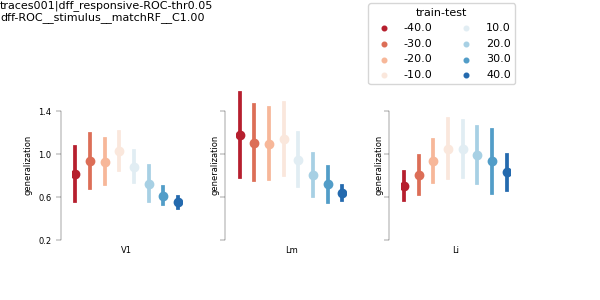

/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_ncells/morphlevel/size_single/controls generalization_split_traintest__dff-ROC__stimulus__matchRF__C1.00


In [173]:
metric='generalization'
size_metric='train_test_diff'
multi_comp_test='fdr_bh'

curr_ncells=max_ncells

print(datameans_per_iter.groupby(['visual_area'])[metric].mean().round(3))
print(datameans_per_iter.groupby(['visual_area'])[metric].std().round(3))

plotd = datameans_per_iter[(datameans_per_iter.novel) 
                         & (datameans_per_iter['n_cells']==curr_ncells)].copy()

diff_palette = 'Greys' if size_metric=='train_test_abs' else 'RdBu'

#fig, axn = pl.subplots(1,2, figsize=(6.5,3), dpi=dpi, sharex=True, sharey=False)
fig, axn = pl.subplots(1, 3, figsize=(6,3), sharex=True,sharey=True)

# PLOT 2
for va, vg in plotd.groupby(['visual_area']):
    ax = axn[visual_areas.index(va)]
    sns.pointplot(x=size_metric, y=metric, hue=size_metric, data=vg, ax=ax, 
             palette=diff_palette, scale=0.8, 
              dodge=0.5, join=False, ci='sd', markers='o')
    ax.legend_.remove()
    ax.set_yticks(np.linspace(0.2, 1.4, 4))
    ax.set_ylim([0.2, 1.6])    
    ax.set_xlabel(va)
axn[-1].legend(bbox_to_anchor=(1.1, 1.), loc='lower right', title='train-test', markerscale=0.5, fontsize=8,
         ncol=2)

pl.tight_layout()
pl.subplots_adjust(left=0.12, right=0.85, wspace=0.5, top=0.7, bottom=0.2)

sns.despine(bottom=True, offset=8, trim=True)
ax.tick_params(which='both', axis='x', size=0)
ax.set_xticks([])

pplot.label_figure(fig, '%s\n%s' % (data_id, aggr_id))
figname='generalization_split_traintest__%s' % aggr_id #% (dset_str, shuffle_str, errstr)
#figname='genratio_meanbyiter_split_traintransform__%s_%s_%s2' % (dset_str, shuffle_str, errstr)

pl.savefig(os.path.join(curr_dst_dir,  '%s.svg' % figname))
print(curr_dst_dir, figname)

<IPython.core.display.Javascript object>


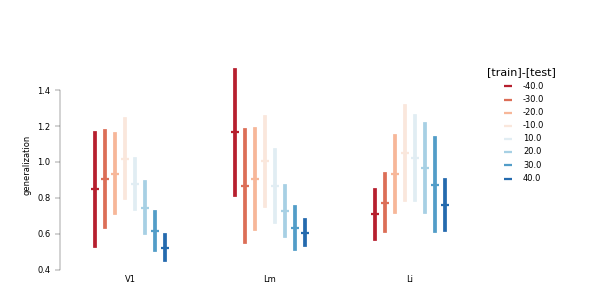

In [112]:
#fig, axn = pl.subplots(1,2, figsize=(6.5,3), dpi=dpi, sharex=True, sharey=False)
fig, ax = pl.subplots(figsize=(6,3))

# PLOT 2

sns.pointplot(x='visual_area', y=metric, data=plotd, ax=ax, 
           hue=size_metric, order=visual_areas, palette=diff_palette, scale=0.8, 
              dodge=0.5, join=False, ci='sd', markers='_')
ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False, 
         title='[train]-[test]')
ax.tick_params(which='both', axis='x', size=0)
ax.set_xlabel('')
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.8)
sns.despine(bottom=True, trim=True)


In [53]:
import statsmodels.api as sm

In [54]:
iterdf.

SyntaxError: invalid syntax (<ipython-input-54-f61dbf0a6fe9>, line 1)

In [ ]:
if analysis_type=='by_fov':
    bw_cond_colors = dict((k, [0.7]*3) for k in ['data', 'shuffled'])
    cond_colors = {'data': 'cornflowerblue', 'shuffled': [0.3]*3}


    fig, axn = pl.subplots(1,2, figsize=(6.5, 3), sharex=True, sharey=True)
    for ai, (is_intact, df) in enumerate(DF.groupby('intact')):
        ax=axn[ai]
        corr_str = 'Intact' if is_intact else 'No corrs.'
        ax.set_title(corr_str)
        sns.barplot(x='visual_area', y=metric, data=df, ax=ax,
                hue='condition', order=visual_areas, ci=None, palette=bw_cond_colors)
        sns.stripplot(x='visual_area', y=metric, data=df, ax=ax,
                hue='condition', order=visual_areas, palette=cond_colors,
                jitter=False, dodge=True, s=4)

        ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
        ax.legend_.remove()
    axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left')
    pl.subplots_adjust(left=0.1, right=0.85, bottom=0.2, top=0.85,
                      wspace=0.3)

    pplot.label_figure(fig, aggr_id)
    figname = 'intact_vs_indep'
    pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [167]:
dst_dir

'/n/coxfs01/julianarhee/aggregate-visual-areas/decoding/py3_by_fov'

<IPython.core.display.Javascript object>


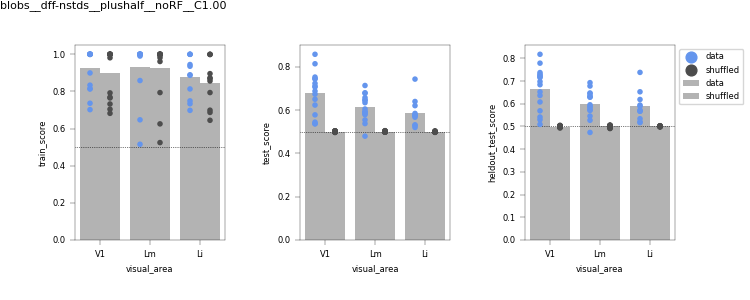

In [168]:
bw_cond_colors = dict((k, [0.7]*3) for k in ['data', 'shuffled'])
cond_colors = {'data': 'cornflowerblue', 'shuffled': [0.3]*3}

metric_list = ['train_score', 'test_score', 'heldout_test_score']

fig, axn = pl.subplots(1, len(metric_list), figsize=(2.5*len(metric_list), 3))
for ai, metric in enumerate(metric_list):
    ax=axn[ai]
    sns.barplot(x='visual_area', y=metric, data=df, ax=ax,
            hue='condition', order=visual_areas, ci=None, palette=bw_cond_colors)
    sns.stripplot(x='visual_area', y=metric, data=df, ax=ax,
            hue='condition', order=visual_areas, palette=cond_colors,
            jitter=False, dodge=True, s=4)
    
    ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
    ax.legend_.remove()
axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.85,
                  wspace=0.5)

pplot.label_figure(fig, aggr_id)
figname = 'aggr_performance_metrics'
pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))

In [183]:
DF

,visual_area,datakey,condition,novel,train_transform,test_transform,fit_time,score_time,test_score,train_score,heldout_MI,heldout_aMI,heldout_log2MI,heldout_test_score,C,randi,n_trials,iteration,n_cells,intact
0,Li,20190422_JC076_fov1,data,False,10_20_30_40,10_20_30_40,0.011768,0.000475,0.526641,0.886592,0.011687,0.001365,0.016860,0.532917,1.0,4768.29,240.0,49.5,68.0,True
1,Li,20190422_JC076_fov1,data,False,10_20_30_50,10_20_30_50,0.011565,0.000462,0.536306,0.892078,0.009614,-0.001699,0.013870,0.537917,1.0,5212.13,240.0,49.5,68.0,True
2,Li,20190422_JC076_fov1,data,False,10_20_40_50,10_20_40_50,0.011347,0.000465,0.538179,0.895239,0.012811,0.002960,0.018483,0.543958,1.0,5011.99,240.0,49.5,68.0,True
3,Li,20190422_JC076_fov1,data,False,10_30_40_50,10_30_40_50,0.014093,0.000477,0.512409,0.872984,0.010969,0.000264,0.015826,0.523542,1.0,4847.80,240.0,49.5,68.0,True
4,Li,20190422_JC076_fov1,data,False,20_30_40_50,20_30_40_50,0.010543,0.000458,0.544619,0.900372,0.016351,0.008292,0.023590,0.552708,1.0,4803.09,240.0,49.5,68.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,V1,20191006_JC110_fov1,shuffled,False,10_20_30_40,10_20_30_40,0.005513,0.000721,0.496537,1.000000,0.009511,-0.000313,0.013722,0.493585,1.0,5074.57,264.0,49.5,221.0,True
626,V1,20191006_JC110_fov1,shuffled,False,10_20_30_50,10_20_30_50,0.005505,0.000725,0.507712,1.000000,0.012291,0.003762,0.017732,0.476226,1.0,5191.18,264.0,49.5,221.0,True
627,V1,20191006_JC110_fov1,shuffled,False,10_20_40_50,10_20_40_50,0.005547,0.000745,0.502377,1.000000,0.009419,-0.000424,0.013588,0.503962,1.0,5052.93,264.0,49.5,221.0,True
628,V1,20191006_JC110_fov1,shuffled,False,10_30_40_50,10_30_40_50,0.005608,0.000740,0.491905,1.000000,0.011515,0.002673,0.016613,0.510189,1.0,4996.48,264.0,49.5,221.0,True


<IPython.core.display.Javascript object>


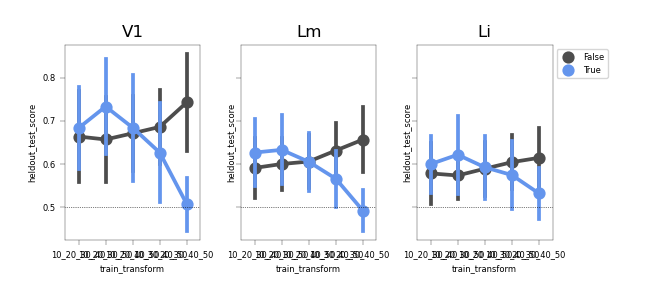

In [206]:
plotd = DF[DF.intact].copy()

keys = [True, False]
bw_cond_colors = dict((k, [0.7]*3) for k in keys)
#cond_colors = {'data': 'cornflowerblue', 'shuffled': [0.3]*3}
cond_colors = {keys[0]: 'cornflowerblue', keys[1]: [0.3]*3}

metric = 'heldout_test_score'
fig, axn = pl.subplots(1,3, figsize=(6.5, 3), sharex=True, sharey=True)
for vi, (va, df) in enumerate(DF.groupby('visual_area')):
    ai = visual_areas.index(va)
    ax=axn[ai]
    ax.set_title(va)
    sns.pointplot(x='train_transform', y=metric, data=df, ax=ax,
            hue='novel', ci='sd', palette=cond_colors)
#     sns.stripplot(x='visual_area', y=metric, data=df, ax=ax,
#             hue='condition', order=visual_areas, palette=cond_colors,
#             jitter=False, dodge=True, s=4)
    
    ax.axhline(y=chance_level, ls=':', c='k', lw=0.5)
    ax.legend_.remove()
axn[-1].legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(left=0.1, right=0.85, bottom=0.2, top=0.85,
                  wspace=0.3)

# pplot.label_figure(fig, aggr_id)
# figname = 'intact_vs_indep'
# pl.savefig(os.path.join(curr_dst_dir, '%s.svg' % figname))